### Drone challenge from Kaggle:  https://www.kaggle.com/competitions/hashcode-drone-delivery

#### To create a UML diagram from code:   pyreverse -o png <path_to_src>

In [15]:
PSEUDO=True
PSEUDOORDERLIMIT=82
DEBUG=True
filename="busy_day.in"


#filename="busy_dayv2.in"

import time
#Start the timer
start_time = time.time()

import random
import math
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.spatial
import scipy.spatial.distance as distance
from operator import itemgetter
    


class Base:
    def __init__(self):
        self.name="parent object to contain data and algorithm subclasses"
        
class Data(Base):
    clock=0
    score=0
    scoreList=list()
    
    def __init__(self):
        super().__init__()
        self.name="data parent object"  
        self.clock=99
    def clockTick():
        Data.clock+=1
        return
    def incScore(n):
        Data.score+=n
    def addScoreTup(tup):
        Data.scoreList.append(tup)
    def getScore():
        return Data.score
    def getScoreListLen():
        return len(Data.scoreList)
    
class Algo(Base):
    def __init__(self):
        super().__init__()
        self.name="Algorithm parent object"
    
class Calculate(Algo):                    ############ A L G O ##################
    def __init__(self):
        super().__init__()
        
    def loadSkynet(self):
        theseDrones=skynet.getDroneList()
        t<2 and print("The drones assigned to skynet are: {}".format(theseDrones))
        
        for droneNum in theseDrones:
            
            #If this drone is available, Which warehouse is this drone at?
            if not d[droneNum].isAvail():
                #DEBUG and print("Drone #{} is currently busy.".format(droneNum))
                continue
            r,c=d[droneNum].getPos()
            thisWhNum=whDict[(r,c)]
            #print("   Drone:{} is currently located at Wh#{}".format(droneNum,thisWhNum))
            
            ########  First look for transfers from this warehouse ################################################
            allWhIndexes=list(range(Warehouse.getQty()))
            allWhIndexesExcLocal=allWhIndexes
            if thisWhNum in allWhIndexes:
                allWhIndexesExcLocal.remove(thisWhNum)
            for needyWh in allWhIndexesExcLocal:
                imList=w[needyWh].getIntermodalList(thisWhNum)#this will NOT include intermodal transfers in process
            
            if len(imList)>0:
                DEBUG and print("Preparing to load drone#{} on behalf of wh:{}...".format(droneNum,needyWh))
                DEBUG and print("Items in this warehouse needed in the needy wh are:{}".format(imList) )   
                minimumWeightInList=calc.getImMinWeight(imList)  
                excessCapacity=d[droneNum].getExcessCapacity()
                while  excessCapacity >= minimumWeightInList and len(imList)>0:   
                    #select an order from the list
                    orderIndex=calc.selectOrder(imList,excessCapacity)       #if orderindex is False, be careful!
                    if isinstance(orderIndex,bool) and orderIndex==False:     
                        break
                    #raise SystemExit("Stop right there!") 
                    outputVal=ord[orderIndex].getAssignedItem()
                    if isinstance(outputVal,tuple):
                        itemWh,ii=outputVal
                    else:
                        ii=outputVal

                    DEBUG and print("\tAt Wh#{} Loading IM order:{}/item:{} onto drone:{}".format(thisWhNum,orderIndex,ii,droneNum))

                    #mark order as im in-process
                    ord[orderIndex].setIntermodal(True)
                    weight=ord[orderIndex].getWeight()
                    itemIdx=ord[orderIndex].getAssignedItem()
                    intermodal=True
                    result=d[droneNum].load(orderIndex,needyWh,ord[orderIndex].getProdNum(),1,itemIdx,weight,intermodal)
                    excessCapacity=d[droneNum].getExcessCapacity()
                    #remove this item from the intermodal request list at the needy warehouse
                    result=w[needyWh].removeFromIntermodalList(orderIndex,itemIdx)
                    #print("Result of removal of {} {} from wh:{} was: {}".format(orderIndex,itemIdx,needyWh,result) )
                    #calculate the imlist for the next loop
                    imList=w[needyWh].getIntermodalList(thisWhNum) #this will NOT include intermodal transfers in process
                    DEBUG and print("\t====> Wh#{} Loaded order {} onto drone:{}".format(thisWhNum,orderIndex,droneNum))                       
            else:   #imList length =0  so look for a remote IM transfer needed
                #print("Got here: No local IM needed")
                for wh in range(Warehouse.getQty()):
                    if len(w[wh].getIntermodalList())>0:
                        DEBUG and print("Warehouse:{} Intermodal list length:{}".format(wh,len(w[wh].getIntermodalList())))
                        needyWh=wh
                        print("Needy wh choice:{}".format(needyWh))
                        break
                    
                imList=w[needyWh].getIntermodalList()   
                if len(imList)>0:
                    print("IM List:{}".format(imList))     
                if len(imList)==0:
                    break #No intermodal transfers needed
                print("Preparing to load drone#{} on behalf of wh:{}...".format(droneNum,needyWh))
                donorWh=imList[0][0] #Select the first wh in the list (random)
                DEBUG and print("Items (donorWh,orderIndex,itemIndex) needed from the donorWh:{} by the needy wh:{} are:{}".format(donorWh,needyWh,imList) )   
                #Trim the list to be just items in the donor warehouse needed by the needy wh
                #imListCulled=[x for x in imList if x[0]=='2']
                #raise SystemExit("Stop right there!")
                
                #imListCulled=[x for x in imList if x[0]==4]
                #print("Culled imList".format(imListCulled))
                #print("Donor Wh: {}".format(donorWh))
                #imlist format [(closestWh,orderIndex,itemIndex),...]
                minimumWeightInList=calc.getImMinWeight(imList)  
                print("minimumWeightInList:".format(minimumWeightInList))
                excessCapacity=d[droneNum].getExcessCapacity()
                print("excess Capacity:".format(excessCapacity))
                while  excessCapacity >= minimumWeightInList and len(imList)>0:   
                    #select an order from the list
                    orderIndex=calc.selectOrder(imList,excessCapacity)       #if orderindex is False, be careful!
                    if isinstance(orderIndex,bool) and orderIndex==False:     
                        break
                    print("orderIndex:".format(orderIndex))
                    #raise SystemExit("Stop right there!") 
                    outputVal=ord[orderIndex].getAssignedItem()
                    print("Output val:".format(outputVal))
                    if isinstance(outputVal,tuple):
                        itemWh,ii=outputVal
                    else:
                        ii=outputVal
                    print("ii:".format(ii))

                    DEBUG and print("\tAt Wh#{} Sending drone:{} to donorWh:{} to retrieve IM order:{}/item:{} ".format(thisWhNum,droneNum,donorWh,orderIndex,ii))

                    #mark order as im in-process
                    ord[orderIndex].setIntermodal(True)
                    weight=ord[orderIndex].getWeight()
                    itemIdx=ord[orderIndex].getAssignedItem()
                    intermodal=True
                    result=d[droneNum].load(orderIndex,donorWh,ord[orderIndex].getProdNum(),1,itemIdx,weight,intermodal)
                    excessCapacity=d[droneNum].getExcessCapacity()
                    #remove this item from the intermodal request list at the needy warehouse
                    result=w[needyWh].removeFromIntermodalList(orderIndex,itemIdx)
                    #print("Result of removal of {} {} from wh:{} was: {}".format(orderIndex,itemIdx,needyWh,result) )
                    #calculate the imlist for the next loop
                    imList=w[needyWh].getIntermodalList(donorWh) #this will NOT include intermodal transfers in process
                    DEBUG and print("\t====> Wh#{} Loaded order {} onto drone:{}".format(thisWhNum,orderIndex,droneNum))                       
            DEBUG and print("Wh{}-->{} IM Drone #{} is full with {} items".format(thisWhNum,needyWh,droneNum,d[droneNum].getNumItems() ))
        t<2 and print("*"*40+"  Done loading IM drones  "+"*"*40)
        return
                
      
    def deliverLocally(self):
        for wh in range(Warehouse.getQty()): 
            #Each warehouse was designated drones to serve it's local customer orders
            theseDrones=w[wh].getDroneList()
            #t<2 and print("The drones assigned to Wh#{} are: {}".format(wh,theseDrones))
            #t<2 and print("Searching for orders for warehouse:{} ".format(wh))
            for droneNum in theseDrones:
                #t<2 and print("   Wh#{} Determining load for Drone:{}".format(wh,droneNum))
                if d[droneNum].isAvail():
                    #t<2 and print("   Wh#{} Preparing to load drone#{}...".format(wh,droneNum))
                    r,c=d[droneNum].getPos()
                    excessCapacity=d[droneNum].getExcessCapacity()
                    priorityList=w[wh].getLocalPriorityList()
                    if len(priorityList)==0:
                        #print("\t\t\tWh#{} Nothing left to load for drone:{}".format(wh,droneNum))
                        break
                    minimumWeightInList=w[wh].getPriorityListMinWeight()
                    #make sure an option is available, if not, proceed to next
                    endOfOrders=False
                    #print("ExcessCap:{}  minWeightinList:{}".format(excessCapacity,minimumWeightInList))
                    while  excessCapacity >= minimumWeightInList and not endOfOrders:   
                        allowIntermodal=False
                        orderIndex=w[wh].popNextOrder(excessCapacity,allowIntermodal)
                        if isinstance(orderIndex,bool) and orderIndex==False:   #False indicates no valid orders to load
                            endOfOrders=True
                        else:
                            #ord[orderIndex].showStatus()
                            #print("\tWh#{} Loaded order {} onto drone:{}".format(wh,orderIndex,droneNum))
                            weight=ord[orderIndex].getWeight()
                            itemIdx=ord[orderIndex].getAssignedItem()
                            result=d[droneNum].load(orderIndex,wh,ord[orderIndex].getProdNum(),1,itemIdx,weight)

                            excessCapacity=d[droneNum].getExcessCapacity()
                            #print("\tWh#{} Drone: {}  remaining capacity: {}".format(wh,droneNum,excessCapacity))
                            priorityList=w[wh].getPriorityList()
                            if len(priorityList)==0:
                                break
                            minimumWeightInList=w[wh].getPriorityListMinWeight()

                    #print("Drone: {} is loaded with {} boxes ".format(droneNum,d[droneNum].getNumItems()))
                    r,c=d[droneNum].getDest()
                    if d[droneNum].getNumItems()>0:
                        DEBUG and print("Wh#{} Drone #{} has {} boxes Next stop:{},{} at time: {}"\
                          .format(wh,droneNum,d[droneNum].getNumItems(),r,c,d[droneNum].getDestTime()))
        #raise SystemExit("Stop right there!")   
    def getImMinWeight(self,imList):
        minWeight=maxLoad
        for tup in imList:
            #(closestWh,orderIndex,itemIndex)
            _,_,ii=tup
            weight=item[ii].getWeight()
            if weight<minWeight:
                minWeight=weight
        return minWeight
    def selectOrder(self,imList,excessCapacity):
        selectionLessThanEC=False
        for index,tup in enumerate(imList):
            #(closestWh,orderIndex,itemIndex)
            _,oi,ii=tup
            weight=item[ii].getWeight()
            if weight<excessCapacity:
                selectionLessThanEC=oi
                break
        return selectionLessThanEC
    
    def getAllOrdersForWh(self,wh):
        orderList=list()
        wr,wc=w[wh].getPos()
        for i in range(Order.getOrderQty()):
            if ord[i].getWh()==wh:
                r,c=ord[i].getPos()
                dist=calc.dist( (r,c),(wr,wc) )
                orderList.append( (i,dist)   )
        #Now sort the generated list of tuples by distance
        orderList.sort(reverse=False,key = lambda x: x[1])
        return orderList
    def maxScores(self):
        for orderIndex in range(Order.getQty()):
            origOrder=ord[orderIndex].getOrderNum()
            minTimeToComplete=0
            for i in range(Order.getQty()):
                if ord[i].getOrderNum()==origOrder:
                    imDist,whDist= ord[i].getDistances()
                    #print("{}  {}".format(i,ord[i].getDistances()))
                    minTimeToComplete+=imDist+whDist
            maxScore=(deadline-minTimeToComplete)/deadline
            ord[orderIndex].setMaxScore( maxScore )
    def finalStats(self):
        finalTime=calc.currentTime()
        #show total order qty
        print("Total orders possible:{}  originally in stock:{}  ".format(Order.getQty(), origInStockCounter ))
        print("Total intermodal transfers completed:{}"  .format(intermodalXfersCompleted)  )
        #Show order qty delivered
        filled=0
        unfilled=0
        totalScore=0
        #print("OrdIndex fulfilled  remItems  isAssigned  assignedItemIndex turnFulfilled\n"+'-'*50)
        for i in range(Order.getQty()):
            fulfilled, remItems,isAssigned,assignedItemIndex,turnFulfilled=ord[i].getEndStatus()
            DEBUG and print(i,fulfilled, remItems,isAssigned,assignedItemIndex,turnFulfilled)
            if fulfilled:
                filled +=1
            else:
                unfilled+=1
        print("Filled:{}   Unfilled:{}".format(filled,unfilled)) 
        self.finalScore(finalTime)
        
    def finalScore(self,endTime):
        #Calc final score for this sim

        finalScore=0
        for i in range(totalOrders):   #totalOrders came from the reading of the orig input file
            #print("Processing orderNum:{} of {}".format(i,totalOrders))

            lastDeliveryTime=endTime  #initialize to a large num
            foundFulfilled=False
            for oi in range(Order.getQty()):
                if ord[oi].getOrderNum()==i and ord[oi].getRemItems()==0:   #in the list of orderlines, just look at the ones that match the orderNum
                    foundFulfilled=True
                    #print('FulfilledTime:{} {}'.format( ord[oi].getFulfilledTime() ,  isinstance(ord[oi].getFulfilledTime(),int) ) )
                    if not isinstance(ord[oi].getFulfilledTime(),bool) and ord[oi].getFulfilledTime()< lastDeliveryTime:
                        #print('<{}'.format(lastDeliveryTime),end='')
                        lastDeliveryTime=ord[oi].getFulfilledTime()
                        #print("Updating last delivery time to:{}".format(lastDeliveryTime))

                        #itemsInThisOrder=ord[oi].getItemsInOrder()
            if foundFulfilled:
                thisScore=math.ceil(  (  (endTime-lastDeliveryTime) /endTime)  * 100 )
                finalScore+= thisScore
                DEBUG and print("Order:{} score:{}".format(i,thisScore))
        print("Final score:{} at final time:{}".format(finalScore,endTime))  
        return finalScore
        
    def nearestWh(self,r,c,whSubList=list()):
        if len(whSubList)==0:
            whSubList=list(range(Warehouse.getQty() ))
        #print("Looking for warehouse closest to: {},{}".format(r,c) )
        maxDist=gridRows+gridCols  #Max possible value
        closestDist=maxDist
        closestWhIndex=-1  
        for index,(wr,wc) in enumerate(whLocs):
            if index not in whSubList:
                continue
            distance=calc.dist((r,c),(wr,wc)) 
            if distance<closestDist:
                closestDist=distance
                closestWhIndex=index
        #print("Closest warehouse is:{}".format(closestWhIndex) )
        return closestWhIndex 

    def findAvailProdInWh(self,pn,wh):
        for i in range(Item.getQty()):
            itemIndex,assigned,prodNum,facType,facIndex=item[i].getStatus3()
            if prodNum==pn and facType=='W' and facIndex==wh and assigned==False:
                break
        return itemIndex
            
    def getStatus3(self):
        #itemIndex,OrderIndex,prodNum,facType,facIndex
        return (self.__index,self.__assignedToOrder,self.__prodNum,self.__facType,self.__facIndex)
    
    def nearbyWh(self,r,c,whLocList):
        distToWh=list()
        #If the drone is already at a warehouse location then just return that loc
        for index,(wr,wc) in enumerate(whLocs):
            distToWh.append( dist((r,c),(wr,wc))  )
        #now return the index of the minimal value in the list
        minpos = distToWh.index(min(distToWh))
        #print("The closest warehouse to {},{} is at index {} at a distance of:{}".format(r,c,minpos,min(distToWh)))
        return minpos,min(distToWh)
    def getNewLocation(self,currR,currC,destR,destC,timeInterval=1):
        adjacent=destR-currR
        opposite=destC-currC
        hyp=math.sqrt(adjacent**2+opposite**2)
        angleRadians=math.atan2(opposite,adjacent)
        #print("Opposite:{}   Adj:{}   Angle:{} Hyp:{}".format(opposite,adjacent,angleRadians,hyp))
        newRow=currR+math.cos(angleRadians)*timeInterval
        newCol=currC+math.sin(angleRadians)*timeInterval
        if hyp<1:
            return destR,destC
        return newRow,newCol
    def decodeLabel(self,labelString):
        if ('L' in labelString) or ('D' in labelString):
            label=labelString.split()
            droneNum=int(label[0])
            DLW=label[1]
            wh=int(label[2])
            prodNum=int(label[3])
            qty=int(label[4])
            wait=False
            return (droneNum,DLW,wh,prodNum,qty,wait)
        if ('D' in labelString):
            label=labelString.split()
            droneNum=int(label[0])
            DLW=label[1]
            wait=int(label[2])
            wh=False
            prodNum=False
            qty=False
            return (droneNum,DLW,wh,prodNum,qty,wait)
        return (False,False,False,False,False,False)
    
        
    def genLabel(self,labelTup,labelType):
        DLW=labelType
        if 'L' in  labelType:
            droneNum,DLW,warehouseNum,prodNum,prodQty,_,_,_,weight=labelTup
            label=str(droneNum)+' '+DLW+' '+str(warehouseNum)+' '+str(prodNum)+' '+str(prodQty)
        elif 'D' in  labelType:
            droneNum,DLW,_,prodNum,prodQty,orderIndex,_,itemIndex,weight=labelTup
            #Fetch the original item number using the order index
            orderNum=ord[orderIndex].getOrderNum()
            label=str(droneNum)+' '+'D'+' '+str(orderNum)+' '+str(prodNum)+' '+str(prodQty)
        elif 'I' in  labelType:
            #droneNum,DLW,_,prodNum,prodQty,orderIndex,_,itemIndex,weight=labelTup
            droneNum,DLW,warehouseNum,prodNum,prodQty,orderIndex,_,itemIndex,orderWeight=labelTup
            orderNum=ord[orderIndex].getOrderNum()
            label=str(droneNum)+' '+'U'+' '+str(warehouseNum)+' '+str(prodNum)+' '+str(prodQty)
        elif 'U' in  labelType:
            #droneNum,DLW,_,prodNum,prodQty,orderIndex,_,itemIndex,weight=labelTup
            droneNum,DLW,warehouseNum,prodNum,prodQty,orderIndex,_,itemIndex,orderWeight=labelTup
            orderNum=ord[orderIndex].getOrderNum()
            label=str(droneNum)+' '+'U'+' '+str(warehouseNum)+' '+str(prodNum)+' '+str(prodQty)        
        elif 'W' in labelType:    
            droneNum,DLW,_,_,_,_,wait,_,weight=labelTup
            label=str(droneNum)+' '+DLW+' '+str(wait)
        #print ("Generated label:{} of type:{}".format(label,type(label)))
        return label
    def genOrderList(self,r,c):   #Unused
        #return a list of orders in the neighborhood with score and dist from r,c and dist from nearest neighbor 
        potentialOrdList=list()
        
        potentialOrdList=calc.genOrderList(w[wh].getPos())    
      
    def warehouseWithProdRandom(self,prodNum,w,item):
        #Identify a random warehouse that has this product. 
        #Question: Will the product still be there when the drone arrives??
        #print("Looking for product number:{} in any warehouse".format(prodNum))
        #tempWHlist=list()
        r = list(range(Item.getQty()))
        random.shuffle(r)
        #print("Quantity of items:   Item.getQty() {}".format(Item.getQty()))
        for i in r:
            #print("item[i].getFacType:{}   item[i].getProdNum():{}".format(item[i].getFacType(),item[i].getProdNum()))
            if item[i].getFacType()=='W' and item[i].getProdNum()==prodNum:    
                return item[i].getWarehouseNum()   
        return False
    def warehousesWithProd(self,r,c,prodNum,w,item):
        #Identify all warehouses that have this product. 
        #Question: Will the product still be there when the drone arrives??
        
        #print("Looking for product number:{} in warehouses".format(prodNum))
        itemlist=list()
        tempWHlist=list()
        #print("Quantity of items:   Item.getQty() {}".format(Item.getQty()))
        for i in range(Item.getQty()):
            #print("item[i].getFacType:{}   item[i].getProdNum():{}".format(item[i].getFacType(),item[i].getProdNum()))
            if item[i].getFacType()=='W' and item[i].getProdNum()==prodNum:    
                tempWHlist.append(item[i].getWarehouseNum() )  
        return tempWHlist
    
    
    def loadList(self,r,c,maxLoad,w,item):
        #Find optimal orders to fulfill by calculating the score for the delivery of each product
        DEBUG and print("Looking for product number:{} in warehouses".format(prodNum))
        itemlist=list()
        tempWHlist=list()
        #print("Quantity of items:   Item.getQty() {}".format(Item.getQty()))
        for i in range(Item.getQty()):
            if item[i].getFacType()=='W':    
                 tempWHlist.append(item[i].getWarehouseNum() )  
        #print("Warehouses with the product:{} are:()".format(prodNum,tempWHlist))
        costFnList=list()
        return costFnList
        #for orderNum in range(Order.getOrderQty()):
        #    if ord[orderNum].isFulfilled()==True or ord[orderNum].msgQueue()==True:
        #        costFnList.append(0)            
    def updateRemItems(self,ordIndex):                            ################################################
        #Given this single-item order index, find other lines from this same order by using the common orderNum
        if ord[ordIndex].getRemItems()==0:
            print("Error 007: Remaining items is already 0. This shouldn't happen.")
            return False
        targetOrderNum=ord[ordIndex].getOrderNum()
        linesInThisOrderList=list()
        for i in range(Order.getQty()):
            index,row,col,orderNum,prodNum,remItems= ord[i].getStatus()
            if orderNum==targetOrderNum:
                linesInThisOrderList.append(index)
        orderLineQty=len(linesInThisOrderList)
        #Now count the number that are fulfilled
        fulfilledCount=0
        for i in linesInThisOrderList:
            if ord[i].isFulfilled():
                fulfilledCount+=1
        remItems=len(linesInThisOrderList)-fulfilledCount
        #Update the ord[].setRemItems(n) for each
        for i in linesInThisOrderList:
            ord[i].setRemItems(remItems)
        return remItems
  
    def getRandomUnfilledOrder(self,ord):                     
        #tempUnfilledOrderList=list()
        r = list(range(Order.getOrderQty()))
        random.shuffle(r)
        for i in r:
            if ord[i].isFulfilled()==False: 
                return ord[i].getStatus()              
        return False
    def getRemainingOrders(self):
        unfilledOrders=0
        unfilledOrdersList=list()
        for i in range(Order.getQty()):
            if ord[i].isFulfilled()==False:
                unfilledOrders+=1
                unfilledOrdersList.append(i)
        return unfilledOrders,unfilledOrdersList
            
    def getNearbyUnfilledOrders(self,warehouseIndex,k):       ####This is the most CPU intensive routine
        wr,wc=w[warehouseIndex].getPos()
        #allOrderlocs is a permanent list of the location of all orders
        X=np.array(allOrderlocs)
        x=np.array([[wr,wc]])
        inds = knn(x, X, k)
        potentialOrderList=list()
        for i in inds:
            #print(ord[i].getStatus())
            if ord[i].isFulfilled()==False:
                #print('=',end='')
                prodNum=ord[i].getProdNum()
                if calc.checkStock(warehouseIndex,prodNum)==True:
                    #print("Found the product in warehouse!!")
                    potentialOrderList.append(i)            
        return potentialOrderList
    def getAvgDistNearbyUnfilledOrders(self,r,c,k):
        #allOrderlocs is a permanent list of the location of all orders
        X=np.array(allOrderlocs)
        x=np.array([[r,c]])
        inds = knn(x, X, k)
        xyList=list()
        nextWhDist=list()
        for i in inds:
            #print(ord[i].getStatus())
            if ord[i].isFulfilled()==False:
                orderRow,orderCol=ord[i].getPos()
                xyList.append( calc.distance(orderRow,orderCol,r,c) ) 
                _,whDist=calc.nearbyWh(r,c,whLocs)
                nextWhDist.append( whDist )
        return np.mean(xyList),np.mean(nextWhDist)
    
    def orderMetrics(self,droneRow,DroneCol,wr,wc,potentialOrdList):      
        orderMetricsList=list()
        for i in potentialOrdList:
            index,row,col,orderNum,prodNum,remItems= ord[i].getStatus()
            weight=ord[i].getWeight()
            #compute dist to wh, nearest neighbor, 
            droneDist=dist((wr,wc),(droneRow,DroneCol) )
            whDist=dist((wr,wc),(row,col) )
            score=((deadline-(calc.currentTime()+droneDist+whDist))/deadline) /(remItems)
            #score=((deadline-(calc.currentTime()+droneDist+whDist))/deadline) 
            distToNeighbors,neighborAvgDistToWh=calc.getAvgDistNearbyUnfilledOrders(row,col,4)
            orderMetricsList.append((i,score,distToNeighbors,neighborAvgDistToWh,weight))
        return orderMetricsList
    
    
    def getRandomAvailableDrone(self,d):
        r = list(range(Drone.getQty()))
        random.shuffle(r)
        for i in r:
            if d[i].isAvail()==True: 
                return d[i].getStatus()              
        return False
    def distance(self,r1,c1,r2,c2):
        return math.sqrt(    ( r1-r2   )**2 +  ( c1-c2  )**2     )
    def dist(self,tup1,tup2):
        (r1,c1)=tup1
        (r2,c2)=tup2
        return math.sqrt(    ( r1-r2   )**2 +  ( c1-c2  )**2     )
    def currentTime(self):
        return Data.clock
    def inStock(self,wh,pn):
        #print("Does warehouse:{} have prodNum:{}?".format(wh,pn))
        for i in range(Item.getQty()):
            itemIndex,prodNum,facType,facIndex,assignedToOrder=item[i].getStatus2()
            #print("Next: {}/{} {}/{} {}/{} ".format(prodNum,pn,facType,'W',facIndex,wh))
            
            if facType=='W' and facIndex==wh and prodNum==pn and assignedToOrder==False :
                DEBUG and print("Product {} is in stock (and available) at wh:{}".format(pn,wh))
                return True
        return False         
    def checkStock(self,wh,orderId,itemId,pn):
        DEBUG and print("Does warehouse:{} have order:{} which is assigned item:{} (Prod={})?".format(wh,orderId,itemId,pn))
        #for i in range(totalItemsInSim):
        #print("ItemID:{} {}".format(itemId,type(itemId)))
        itemIndex,OrderIndex,prodNum,facType,facIndex=item[itemId].getStatus3()
        #print("Check: {}/{} {}/{} {}/{} {}/{} {}/{}".format(orderIndex,orderId,itemIndex,itemId,facType,'W',facIndex,wh,prodNum,pn))
            
        if facType=='W' and facIndex==wh and itemIndex==itemId and prodNum==pn:
            #print("Product {} is in stock at wh:{}".format(pn,wh))
            return True
        else:
            DEBUG and print("facType=='W'   {}=={}  {}   {}  {}".format (facType,'W',facType=='W',type(facType),type('W')))
            DEBUG and print("facIndex==wh   {}=={}  {}   {}  {}".format (facIndex,wh,facIndex==wh,type(facIndex),type(wh)))
            DEBUG and print("itemIndex==itemId   {}=={}  {}   {}  {}".format (itemIndex,itemId,itemIndex==itemId,type(itemIndex),type(itemId)))
            DEBUG and print("prodNum==pn   {}=={}  {}   {}  {}".format (prodNum,pn,prodNum==pn,type(prodNum),type(pn)))
        return False 
    def checkItem(self,wh,orderId,itemId):
        print("Order:{} Does the item #{} show it is located in this warehouse({})?".format(orderId,itemId,wh))
        #for i in range(totalItemsInSim):
        
        itemIndex,OrderIndex,prodNum,facType,facIndex=item[itemId].getStatus3()
        DEBUG and print("Check: {}/{} {}/{} {}/{} {}/{} ".format(orderIndex,orderId,itemIndex,itemId,facType,'W',facIndex,wh))
            
        if facType=='W' and facIndex==wh and itemIndex==itemIdx:
            #print("Product {} is in stock at wh:{}".format(pn,wh))
            return True
        else:
            DEBUG and print("facType=='W'   {}=={}  {}   {}  {}".format (facType,'W',facType=='W',type(facType),type('W')))
            DEBUG and print("facIndex==wh   {}=={}  {}   {}  {}".format (facIndex,wh,facIndex==wh,type(facIndex),type(wh)))
            DEBUG and print("itemIndex==itemIdx   {}=={}  {}   {}  {}".format (itemIndex,itemId,itemIndex==itemId,type(itemIndex),type(itemId)))
        return False 
    
    def xfer2Drone(self,itemIndex,droneNum):    
        #are item and drone in the same location??

        result=item[itemIndex].droneLoad(droneNum)
        return result

    def showLog(self):
        for i in range(len(log)):
            print(log[i].getLine())
        return
    
    
class Log(Data):    ########## Logfile to store commands  #######
    counter=-1
    def __init__(self,logString):
        super().__init__()
        Log.counter += 1
        self.__logString=logString
    def getCount():
        return Log.counter
    def getQty():
        return Log.counter
    def getLine(self):
        return self.__logString
    def show(self):
        print(self.__logString)
    def showAll():
        for i in range(Log.getQty()):
            log[i].show()
    def showAllForDrone(dn):
        for i in range(Log.getQty()):
            line=log[i].getLine().split()
            if int(line[0])==dn:
                print(line)
            
        
    
class Warehouse(Data):              ####  Warehouse ####
    counter=0
    def __init__(self,warehouseNum,row,col):
        self.__index=Warehouse.counter
        Warehouse.counter += 1
        super().__init__()
        #self.counter += 1
        self.__warehouseNum=warehouseNum
        self.__intermodalList=list()
        self.__row=row
        self.__col=col
        self.__droneList=list()
        self.__priorityList=list()
    def generatePriorityList(self):
        self.__priorityList=list()
        #create list of all orders for this wh with associated metrics tuple
        #Priority list fields: index,maxscore,weight,intermodal
        for i in range(Order.getQty()):
            if ord[i].getWh()==self.__warehouseNum and not ord[i].isFulfilled() and not ord[i].getDeliveryInProcess()==True:
                #print("Orders: {}".format(i))
                ms=ord[i].getMaxScore()
                self.__priorityList.append( (i,ms,ord[i].getWeight(),ord[i].isIntermodal()) )
        self.__priorityList.sort(reverse=True,key = lambda x: x[1])
        #print("Priority:{}".format(self.__priorityList))
        #return self.__priorityList
    def showPriorityList(self):
        print("orderIndex,maxscore,weight,intermodal True/False")
        print("Warehouse:{} Priority List:{}".format(self.__warehouseNum,self.__priorityList))
    def getPriorityList(self):
        return self.__priorityList
    def getLocalPriorityList(self):
        localList=list()
        for i in range(len(self.__priorityList)):
            oi,ms,weight,im=self.__priorityList[i]
            if not ord[oi].isIm():
                localList.append(self.__priorityList[i])
        return localList
        #return self.__priorityList
    def getPriorityListMinWeight(self):
        #Find minimum weight in prioritized list that is not intermodal
        PriorityListNoIm = [item for item in self.__priorityList if item[3] == False ]
        if len(PriorityListNoIm)==0:
            return False
        _,_,minimumWeightInList,isIntermodal = min(PriorityListNoIm, key=lambda tup: tup[2])
        return minimumWeightInList
    def popNextOrder(self,maxWeight,allowIntermodal):
        #if allowIntermodal is false, don't include orders with an itemNum type tuple
        #Priority list fields: index,maxscore,weight,intermodal
        #print("popnextOrder:   AllowIntermodal:{}".format(allowIntermodal))
        for i in range(len(self.__priorityList)):   
            if self.__priorityList[i][2]<=maxWeight:
                #print("Priority list item:{} is < maxweight:{}".format(i,maxWeight))
                #print(self.__priorityList[i][3], allowIntermodal)
                if (self.__priorityList[i][3]==False or allowIntermodal==True) :
                    ordIndex=self.__priorityList[i][0]
                    #print("ordIndex:{}   delivery in process:{}".format(ordIndex,ord[ordIndex].getDeliveryInProcess()))
                    if ord[ordIndex].getDeliveryInProcess()!=True:
                        DEBUG and print("Length of self.__priorityList: {}  i={}".format(len(self.__priorityList),i))
                        self.__priorityList.pop(i)
                        DEBUG and print("returning order index :{}".format(ordIndex))
                        return ordIndex
        return False
    def assignDrone(self,droneNum):
        self.__droneList.append(droneNum)
    def getDroneList(self):
        return self.__droneList
    def getStatus(self):
        return self.__warehouseNum,self.__row,self.__col
    def getCount(self):
        return self.counter
    def getQty():
        return Warehouse.counter
    def getPos(self):
        return self.__row,self.__col                           
    def addToIntermodalList(self,tup):
        self.__intermodalList.append(tup)
    def removeFromIntermodalList(self,target_oi,target_ii):
        #print("Request for removal of ord:{} item:{} from IM list on Wh:{}".format(target_oi,target_ii,self.__warehouseNum))
        for i in range(len(self.__intermodalList)):
            sourceWh,oi,ii= self.__intermodalList[i]
            if isinstance(target_ii,tuple):
                #print("Converting tuple: {}".format(target_ii))
                target_ii,donorWh=target_ii
            if oi==target_oi and ii==target_ii:
                self.__intermodalList.pop(i)
                #print("Success!")
                return True
        #print("Failed.")
        return False
        
    def getIntermodalList(self,wh=-1):
        #(closestWh,orderIndex,itemIndex)
        #By default (wh=-1) return the whole list
        # otherwise only return the tuples from the warehouses in the provided list
        ## new feature: do not include orders that are currently being flown intermodally
        newList=list()
        if wh==-1:
            for tup in self.__intermodalList:
                closestWh,orderIndex,itemIndex=tup
                if ord[orderIndex].getIntermodal()!=True:
                    newList.append( (closestWh,orderIndex,itemIndex)    )
            return newList
        else:
            #print("searching for Wh={}".format(wh))
            imList = [tup for tup in self.__intermodalList if tup[0] == wh]
            for tup in imList:
                closestWh,orderIndex,itemIndex=tup
                if ord[orderIndex].getIntermodal()!=True:
                    newList.append( (closestWh,orderIndex,itemIndex)    )
            return newList
            
    def getInventory(self,itemObj,totalItemsInSim):
        #print("Item is type {}".format(itemObj))
        #itemQuantity=itemObj[0].getQty()
        #print("itemQuantity:{}".format(itemQuantity))
        itemCount=0
        for i in range(totalItemsInSim):
            if itemObj[i].getWarehouse()==('W',self.__warehouseNum):
                itemCount+=1
        return itemCount
    def loadInitialProduct(self,p,productNum,qty):
        p[productNum].addItem(qty,'W',self.__warehouseNum)

class VirtualWarehouse(Data):
    counter=0
    def __init__(self,vwn):
        self.__index=VirtualWarehouse.counter
        VirtualWarehouse.counter += 1
        super().__init__()
        self.__droneList=list()
        self.__priorityList=list()
    def assignDrone(self,droneNum):
        self.__droneList.append(droneNum)
    def getDroneList(self):
        return self.__droneList
    def showStatus(self):
        print("Skynet: VirtualWarehouse {}  ".format(  self.__droneList))


class ProductType(Data):               ############## ProductType Object ############
    counter=0
    def __init__(self,prodNum,weight):
        super().__init__()
        self.counter += 1
        self.__prodNum=prodNum
        self.__weight=weight
        self.__qty=0
        self.__itemList=list()
    def getWeight(self):
        return self.__weight
    def getStatus(self):
        return (self.__prodNum,self.__weight)
    def addItem(self,qty,facilityType,facilityNum):
        #print("Adding item: {} with qty:{} at {}{}".format(self.__prodNum,qty,facilityType,facilityNum))
        for ii in qty:
            #print('.',end='')
            self.__itemList.append(self.__qty)
            self.__qty+=1
            #print("self.__itemList:{}".format(self.__itemList))
            
            #self.__item[self.__itemList[self.__qty]].load(self.__prodNum,self.__weight,(facilityType,facilityNum))
        return
        
        
class Item():              ############## Item Object ############
    counter=0
    def __init__(self,prodNum,facType,facIndex,weight):
        #super().__init__(prodNum,weight)
        self.__index=Item.counter
        Item.counter += 1
        self.__prodNum=prodNum
        self.__weight=weight
        self.__facType=facType   #indicating D,W or C  for Drone/Warehouse/Cust
        self.__facIndex=facIndex  #index of container D/W/C           
        self.__deliveryTime=-1
        self.__assignedToOrder=False
        #print("Instantiated new item object")
    def setLoc(self,facType,facIndex):
        self.__facType,self.__facIndex=facType,facIndex
    def getQty():
        return Item.counter
    def getWeight(self):
        return self.__weight
    def getWarehouse(self):
        return self.__facType,self.__facIndex
    def getWarehouseNum(self):
        return self.__facIndex
    def getFacType(self):
        return self.__facType    
    def getProdNum(self):
        return self.__prodNum
    def load(self,prodNum,facType,facIndex):
        self.counter += 1
        self.__prodNum=num
        self.__weight=weight
        self.__facType=facType   #indicating D,W or C  for Drone/Warehouse/Cust
        self.__facIndex=facIndex  #index of container D/W/C   
        DEBUG and print("Instantiated: {} {} {}{}".format(prodNum,weight,facType,facIndex))
    def droneLoad(self,droneNum):
        self.__facType='D'  
        self.__facIndex=droneNum
        return True
    def setCustDelivery(self,custLoc):  
        self.__facType='C'  
        self.__facIndex=custLoc
        self.__deliveryTime=calc.currentTime()
    def assignToOrder(self,ordNum):
        self.__assignedToOrder=ordNum
    def isAssigned(self):
        return self.__assignedToOrder        
    def getStatus(self):
        return self.__index,self.__prodNum,self.__facType,self.__facIndex
    def getStatus2(self):
        return self.__index,self.__prodNum,self.__facType,self.__facIndex,self.__assignedToOrder

    def getStatus3(self):
        #itemIndex,OrderIndex,prodNum,facType,facIndex
        return (self.__index,self.__assignedToOrder,self.__prodNum,self.__facType,self.__facIndex)
    def showStatus(self):
        print("Item:{}\nProdNum:{}\nLoc:{}{}".format(self.__index,self.__prodNum,self.__facType,self.__facIndex))
        print("Assigned to order:{}".format(self.__assignedToOrder))
        print("Delivery Time:{}".format(self.__deliveryTime))
        print("Weight:{}".format(self.__weight))
        
class Drone(Data):                ###############   Drone ########
    counter=0
    def __init__(self,row,col,maxLoad):
        super().__init__()
        self.__index=Drone.counter
        Drone.counter += 1
        self.__maxLoad=maxLoad
        self.__enRoute=False
        self.__deliveringBoxIndex=False
        self.__destRow=False
        self.__destCol=False
        self.__destTime=-1
        self.__boxes=list()
        self.__labels=list()
        self.__payload=list()
        self.__row=row
        self.__col=col
        self.__assignedToWh=False
        self.__imFlight=False
    #def clearVals(self):
    #    return self.__row,self.__col
    def empty(self):
        self.__enRoute=False
        self.__deliveringBoxIndex=False
        self.__destRow=False
        self.__destCol=False
        self.__destTime=False
        self.__boxes=list()
        self.__labels=list()
        self.__payload=list()
    def removeImBoxes(self):
        #remove any boxes marked Intermodal transfer
        for i in range(len(self.__boxes)-1,-1,-1):
            if self.__boxes[i][1]=='I':
                self.__boxes.pop(i)
    def isAssignedToWh(self):
        return self.__assignedToWh
    def setAssignedToWh(self,val):
        self.__assignedToWh=val
    def getNumItems(self):
        return len(self.__boxes)
    def setImFlight(self,val):
        self.__imFlight=val
    def getImFlight(self):
        return self.__imFlight
    def fly2Cust(self):
        if len(self.__boxes)==0:
            return False
        closestIndex=-1
        closestDist=9999
        closestrc=(-1,-1)
        #find the closest order delivery site for the onboard packages
        for i in range(len(self.__boxes)):
            labelTup=self.__boxes[i]
            droneIndex,DLW,wh,prodNum,qty,orderIndex,wait,itemIndex,weight=labelTup
            cr,cc=ord[orderIndex].getPos()
            dist=calc.distance(self.__row,self.__col,cr,cc)
            if dist <closestDist:
                closestDist=dist
                closestIndex=i
                closestrc=(cr,cc)
        #Now set the Destination and arrival time and enroute params
        self.deliveringBoxIndex(closestIndex)
        self.__enRoute=True
        self.__destRow,self.__destCol=closestrc
        dist=math.ceil( calc.distance(self.__row,self.__col,self.__destRow,self.__destCol) )
        DEBUG and print("Drone #{} Now flying to {},{} for order:{} / item{}".format(self.__index,self.__destRow,self.__destCol,orderIndex,itemIndex))
        DEBUG and print("Hypot:{} Ceiling dist/time:{}".format(calc.distance(self.__row,self.__col,self.__destRow,self.__destCol),dist) )

        currentTime=calc.currentTime()
        self.__destTime=currentTime+dist +1
        
    def xfer2Cust(self):                                                ########## Xfer2Cust  ##############
        #Adjust r,c to exact vals as there may have been accumulated rounding error inflight
        self.__row,self.__col==round(self.__row),round(self.__col)
        #find all boxes that should be delivered to this grid location
        DEBUG and print("Transferring box(es) to cust at {},{} ".format( self.__row,self.__col))
        listOfBoxesToRemove=list()
        tempBoxList=self.__boxes
        for i in range(len(tempBoxList)):
            labelTup=tempBoxList[i]
            droneNum, LDW,_,prodNum,prodQty,orderIndex,_,itemIndex,weight=labelTup
            cr,cc=ord[orderIndex].getPos()
            if ( self.__row,self.__col )==(cr,cc):
                DEBUG and print("Order:{} matches this location {},{} so delivering it here.".format(orderIndex,cr,cc))
                #unload this box
                listOfBoxesToRemove.insert(0,orderIndex)
                
                newBoxList = [x for x in self.__boxes if x[5] != orderIndex ]
                self.__boxes=newBoxList
                DEBUG and print("Removing box order {} from \n=>boxlist:{} \n==>now:{}".format(orderIndex,tempBoxList,self.__boxes))
                ord[orderIndex].setFulfilled(calc.currentTime(),itemIndex)
                assWh=ord[orderIndex].getWh()
                w[assWh].generatePriorityList()
                item[itemIndex].setCustDelivery( (cr,cc) ) #Update this item with its final details
                Data.incScore(1)   
                
                labelTup=(droneNum, 'D',False,prodNum,qty,orderIndex,False,itemIndex,_)
                log.append(Log(calc.genLabel(labelTup,'D')))
                
                
                calc.updateRemItems(orderIndex)                         #*********************************
                
                
                
                
                
        #listOfBoxesToRemove.sort(reverse=True) #pop items from the end of the list to the front
        #for oi in listOfBoxesToRemove: 
        #    print("Removing box with order {} from listOfBoxesToRemove:{}".format(oi,listOfBoxesToRemove))
            #newBoxList = [x for x in self.__boxes if x[5] == oi ] #remove this box from the list
        #self.__boxes=newBoxList
        #print("Remaining boxes:")
        #self.showBoxes()
        ###
        ###Note:after deliveries the priority list of the warehouse should be recalced################
        #####
        
        #if there are more boxes on board, set the flight path to the next closest
        if len(self.__boxes)>0:
            DEBUG and print("Drone:{} is NOT empty. Remaining:{}".format(self.__index,self.__boxes))
            self.fly2Cust()
        else:
            #Drone is empty. Clear values so next round it can be reloaded
            DEBUG and print("Drone:{} is empty {}".format(self.__index,'*'*50))
            self.empty()

    def deliveringBoxIndex(self,boxIndex):  
        self.__deliveringBoxIndex=boxIndex
    def pushBox(self,label):
        self.__boxes.append(  (label) )
        return 
    def swapLabelforDelivery(self,boxIndex):
        labelTup=self.__boxes[boxIndex] 
        labelList=list(labelTup)
        labelList[1]='D'
        labelTup=tuple(labelList)
        self.__boxes[boxIndex]=(labelTup)

    def getBoxes(self):
        boxList=list()
        for b in self.__boxes:
            boxList.append(b)
        return boxList
    def showBoxes(self):
        print("index,LDW,warehouseNum,prodNum,prodQty,orderIndex,wait,itemIndex,orderWeight")
        for b in self.__boxes:
            print("{}  ".format(b),end='')
        print("")
        return 
    def setDest(self,r,c):
        self.__destRow,self.__destCol=r,c
    def getDest(self):
        return self.__destRow,self.__destCol
    def getDestTime(self):
        return self.__destTime
    def setDestTime(self,val):
        self.__destTime=val
    def getExcessCapacity(self):
        currentPayload = sum(tup[8] for tup in self.__boxes)
        return self.__maxLoad-currentPayload
    def getPos(self):
        return self.__row,self.__col
    def setPos(self,r,c):
        self.__row,self.__col=r,c
    def updateLocation(self,newR,newC):
        self.__row,self.__col=newR,newC
    def setEnRoute(self,val):
        self.__enRoute=val
    def isEnRoute(self):
        return (self.__enRoute)
    def isAvail(self):
        return not(self.__enRoute)
    def setAvail(self,val):
        self.__enRoute= not val
    def getStatus(self):
        return self.__index,self.__enRoute,self.__destRow,self.__destCol,self.__destTime
    def showStatus(self):
        print ("Drone #: {}".format(self.__index) )
        print ("En route:{}".format(self.__enRoute) )
        print ("Row:{} Col:{}".format(self.__row,self.__col) )
        print ("Dest Row:{} DestCol:{}".format(self.__destRow,self.__destCol) )
        print ("Dest Time:{}".format(self.__destTime) )
        print ("Assigned to warehouse:{}".format(self.__assignedToWh))
        print ("Intermodal:{}".format(self.__imFlight))
        self.showBoxes()
    def getQty():
        return Drone.counter
    def load(self,orderIndex,warehouseNum,prodNum,prodQty,itemIndex,orderWeight,intermodal=False):

        ord[orderIndex].setDeliveryInProcess(True)
        dr,dc=w[warehouseNum].getPos()
        self.setDest(dr,dc)
        #print ("D#{} Dest Row:{} Dest Col:{} IM:{}".format(self.__index,self.__destRow,self.__destCol,intermodal) )
        dist=math.ceil( calc.distance(self.__row,self.__col,self.__destRow,self.__destCol) )
        
        currentTime=calc.currentTime()
        self.__destTime=currentTime+dist+1
        self.__enRoute=True  
        DEBUG and print ("D#{} Dest Row:{} Dest Col:{} DestTime:{} IM:{}".format(self.__index,self.__destRow,self.__destCol,self.__destTime,intermodal) )
        if intermodal:
            labelTup=(self.__index, 'LI',warehouseNum,prodNum,prodQty,orderIndex,False,itemIndex,orderWeight)
            #   log.append(Log(calc.genLabel(labelTup,'I')))
        else:
            labelTup=(self.__index, 'L',warehouseNum,prodNum,prodQty,orderIndex,False,itemIndex,orderWeight)
            #    log.append(Log(calc.genLabel(labelTup,'L')))
        self.pushBox(labelTup)
        return True
    def hasArrived(self):
        #print("{},{} {},{}".format(self.__row,self.__col,self.__destRow,self.__destCol))
        #if ( self.__destTime==calc.currentTime() ) and ( (round(self.__row),round(self.__col))==((self.__destRow,self.__destCol))  ):

        if ( self.__destTime==calc.currentTime() ) :
            #Adjust r,c to exact vals as there may have been accumulated error inflight
            distanceError=calc.dist( (self.__row,self.__col), (self.__destRow,self.__destCol) )
            if distanceError>(1.5):
                print("Error 006: expected location is outside anticipated rounding error.")
                print("            distance offset={}".format(distanceError))  
                print("            Dest Time: {}   Current Time: {} ".format(self.__destTime,calc.currentTime()))
            self.__row,self.__col==self.__destRow,self.__destCol
            #Is the drone at a warehouse location?
            if  (  self.__row,self.__col  )  in whDict:
                return (True,'W')
            #Is the drone at a customer location for one of the onboard boxes?
            DEBUG and print("Boxes on board:{}".format(self.__boxes))
            for tup in self.__boxes:
                _,_,_,_,_,orderIndex,_,itemIndex,weight=tup
                cr,cc=ord[orderIndex].getPos()
                DEBUG and print("Order:{} has a delivery location of:{},{}".format(orderIndex,cr,cc))
                if (  round(self.__row),round(self.__col)  )==(cr,cc):
                    DEBUG and print("The drones current pos is: {},{} so it has arrived.".format(round(self.__row),round(self.__col)))
                    return (True,'C')
            #We ended up where we thought we wanted to be, but this is not
            #  a warehouse location or an address for an onboard box
            print("Error 005: Drone:{} is confused while at {},{}".format(self.__index,self.__row,self.__col))
            print("( self.__destTime==calc.currentTime() ) {}".format(( self.__destTime==calc.currentTime() ) ))
            print( " (round(self.__row),round(self.__col))==((self.__destRow,self.__destCol))",end='')
            print(  (round(self.__row),round(self.__col)==((self.__destRow,self.__destCol))) )
            
            #self.showStatus()
            
        return (False,False)
        
    
class Order(Data):            ########## Order ########
    counter=0
    def __init__(self,orderNum,row,col,prodNum,remItems,weight): 
        self.__index=Order.counter
        Order.counter+=1
        self.__row=row
        self.__col=col
        self.__orderNum=orderNum
        self.__prodNum=prodNum
        self.__isAssigned=False
        self.__assignedItemIndex=-1
        self.__fulfilled=False
        self.__turnFulfilled=False
        self.__itemDeliveredIndex=False
        self.__itemsInThisOrder=remItems
        self.__remItems=remItems
        self.__msgQueue=False
        self.__weight=weight
        self.__assignedWarehouse=False  #Closest wh to customer
        self.__maxScore=False
        self.__imInProcess=False  #Intermodal
        self.__deliveryInProcess=False 
    def getItemsInOrder(self):
        return self.__itemsInThisOrder
    def setIntermodal(self,val):
        self.__imInProcess=val
    def getIntermodal(self):
        return self.__imInProcess
    def isIm(self):
        if isinstance(self.__assignedItemIndex,tuple):
            return True
        return False
    def setDeliveryInProcess(self,DIPval):
        self.__deliveryInProcess=DIPval
    def getDeliveryInProcess(self):
        return self.__deliveryInProcess
    def getMetrics(self):
        #(intermodal dist, WhDist,remaining items,weight,maxScore)
        if self.isAssigned():
            imDist=0
            wr,wc=w[self.__assignedWarehouse].getPos()
            whDist=calc.dist( (self.__row,self.__col), (wr,wc))
            if isinstance(self.__assignedItemIndex,tuple):
                itemIndex,imWh=self.__assignedItemIndex
                imRow,imCol=w[imWh].getPos()
                imDist=calc.dist( (imRow,imCol), (wr,wc))  
                maxScore=0
                #maxScore=calc.orderMaxScore(self.__index)

            return (imDist,whDist,self.__remItems,self.__weight,maxScore)
        return (False,False,self.__remItems,self.__weight,False)
    def getDistances(self):
        if self.isAssigned():
            imDist=0
            wr,wc=w[self.__assignedWarehouse].getPos()
            whDist=calc.dist( (self.__row,self.__col), (wr,wc))
            if isinstance(self.__assignedItemIndex,tuple):
                itemIndex,imWh=self.__assignedItemIndex
                imRow,imCol=w[imWh].getPos()
                imDist=calc.dist( (imRow,imCol), (wr,wc))  
            return (imDist,whDist)
        return (False,False)
    def getMaxScore(self):
        return self.__maxScore
    def setMaxScore(self,n):
        self.__maxScore=n
        return 
    def getQty():
        return Order.counter
    def isAssigned(self):
        return self.__isAssigned
    def setAssignedItem(self,itemIndex):
        self.__isAssigned=True
        self.__assignedItemIndex=itemIndex
    def isIntermodal(self):
        if isinstance(self.__assignedItemIndex,tuple):
            return True
        else:
            return False
    def getAssignedItem(self):
        return self.__assignedItemIndex
    def setWh(self,wh):
        self.__assignedWarehouse=wh
    def getWh(self):
        return self.__assignedWarehouse        
    def getPos(self):
        return self.__row,self.__col
    def getProdNum(self):
        return self.__prodNum
    def getWeight(self):
        return p[self.__prodNum].getWeight()
    def getOrderNum(self):
        return self.__orderNum
    def setQueue(self,droneNum):
        self.__msgQueue=droneNum
        return 
    def getQueue(self):
        return self.__msgQueue
    def setRemItems(self,remItems):
        self.__remItems=remItems
        return 
    def getRemItems(self):
        return self.__remItems
    def getOrderQty():
        return Order.counter
    def isFulfilled(self):
        return self.__fulfilled
    def setFulfilled(self,t,itemDeliveredIndex):
        self.__turnFulfilled=t
        self.__fulfilled=True
        self.__itemDeliveredIndex==itemDeliveredIndex
    def getFulfilledTime(self):
        return self.__turnFulfilled
    def getStatus(self):
        return self.__index,self.__row,self.__col,self.__orderNum,self.__prodNum,self.__remItems
    def getEndStatus(self):
        return self.__fulfilled, self.__remItems,self.__isAssigned,self.__assignedItemIndex,self.__turnFulfilled
    def showStatus(self):
        print("Order: {}\nLoc:{},{}".format(self.__index,self.__row,self.__col))
        print("Orig OrderNum: {}\nProdNum:{}  Weight:{}".format(self.__orderNum,self.__prodNum,self.__weight))
        print("Is Assigned:{}   AssignedItem:{}".format(self.__isAssigned,self.__assignedItemIndex))
        print("Warehouse:{}\nFulFilledAt:{}".format(self.__assignedWarehouse ,self.__turnFulfilled ))
        print("RemItems: {}\nFulfilled:{}".format(self.__remItems,self.__fulfilled))
        
        print("Delivery in process: {}".format(self.__deliveryInProcess))
class Sim(Algo):
    counter=0
    def __init__(self):
        super().__init__()
        self.counter += 1
        self.__rows=False
        self.__cols=False
        self.__droneQty=False
        self.__deadline=False
        self.__droneMaxPayload=False
    def initializeParams(self,rows,cols,droneQty,deadline,maxLoad):
        self.__rows=rows
        self.__cols=cols
        self.__droneQty=droneQty
        self.__deadline=deadline
        self.__droneMaxPayload=maxLoad        
    def getStatus(self):
        print("Grid:{}x{}".format(self.__rows,self.__cols))
        print("Drone Qty:{}   Max Payload:{}".format(self.__droneQty,self.__droneMaxPayload))
        print("Deadline:{}".format(self.__deadline))
        return
########### Functions   ##################

def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

def knn(x, X, k, **kwargs):
    """
    find indices of k-nearest neighbors of x in X
    """
    d = distance.cdist(x.reshape(1,-1), X, **kwargs).flatten()
    return np.argpartition(d, k)[:k]
############################## Main ##################################
s=Sim()
l=Log('init')
log=list()
calc=Calculate()
item=list()
skynet=VirtualWarehouse(0)

#scoreList=list()   #Append a record each time a full order is completed as a tuple(orderNum,time)
#score=0

#read datafile

extraLinesCounter=0

with open(filename) as fp:
    line = fp.readline()
    line=line.strip()
    phase = 0
    while line: 
        #print("Executing section {} of input file {}: {}".format(phase,filename, line.strip()))
        if phase==0:
            rows,cols,droneqty,deadline,maxLoad=line.split(maxsplit=5)
            gridRows=int(rows)
            gridCols=int(cols)
            droneqty=int(droneqty)
            deadline=int(deadline)
            maxLoad=int(maxLoad)
        elif phase==1:  ########  Simulation  parameters  ##############
            print(line)
            mimItemWeight=maxLoad   #tune this downward as items are processed
            totalProductTypes=int(line)
            line = fp.readline()
            productWeightList = line.split()  #this is a list of product weights
            p=[0]*(totalProductTypes)  #create a list of productType object names
            for productNum in range(totalProductTypes):
                #instantiate each product
                thisWeight=int(productWeightList[productNum])
                if mimItemWeight>thisWeight:
                    mimItemWeight=thisWeight
                p[productNum]=ProductType(productNum,thisWeight)
                #print("productNum:{},Weight:{} ".format(productNum,thisWeight) )
                #pass
            #phase +=1
        elif phase==2:   ########  Warehouse detail  ##############
            whQty=int(line)
            whDict={}
            whLocs=list()
            w=[0]*(whQty)  #create a list of warehouse object names
            for warehouseNum in range(whQty):
                line = fp.readline()
                r,c = line.split()
                r,c=int(r),int(c)
                w[warehouseNum]=Warehouse(warehouseNum,r,c)
                whLocs.append(  (r,c)  )
                whDict[(r,c)]=warehouseNum
                line = fp.readline()
                for productNum,productQty in enumerate(line.split()):
                    productNum,productQty=int(productNum),int(productQty)
                    #instantiate quantity of each product for this warehouse
                    #print("Warehouse:{}   productNum:{}  qty:{}".format(warehouseNum,productNum,productQty))
                    #itemQuantity=item.getQty()
                    for i in range(productQty):
                        item.append(Item(productNum,'W',warehouseNum,p[productNum].getWeight()))
                    pass
                #Validate all products are listed in the input file
                if productNum+1!= totalProductTypes:
                    print("ERROR:  Invalid input file load for warehouse: {} productNum={}".format(warehouseNum,productNum))
                    break
            print("warehouse Locations:{}".format(whLocs))
            #compute average distance btw warehouses
            points=whLocs
            distances = [dist(p1, p2) for p1, p2 in combinations(whLocs, 2)]
            avg_distance = sum(distances) / len(distances)
            print("avg_distance btw warehouses:{}".format(avg_distance))
            closeDist=avg_distance/2
            #instantiate drones
            row,col=w[0].getPos()
            d=list()
            for i in range(int(droneqty)):
                d.append(Drone(row,col,maxLoad))
        elif phase==3:  ########  Customer orders   ##############
            totalOrders=int(line)
            print("There are {} total orders".format(totalOrders))
            allOrderlocs=list()
            ord=list()  #create a list of order object names
            for orderNum in range(totalOrders):
                
                line = fp.readline()
                r,c = line.split()
                r,c = int(r),int(c)
                line = fp.readline()
                orderQty = int(line)
                #ord[orderNum]=Order(orderNum,r,c)
                line = fp.readline()
                if PSEUDO:
                    if orderNum==PSEUDOORDERLIMIT:
                        #orderedProducts=line.split()
                        prodNums = [int(x) for x in line.split()]
                        for index in range(orderQty):
                            #instantiate order
                            allOrderlocs.append( (r,c) )
                            weight=p[prodNums[index]].getWeight()
                            orderIndex=Order.getQty()
                            ord.append(Order(orderNum,r,c,prodNums[index],orderQty,weight))
                        DEBUG and print("OrderNum {}: Cust: {},{}  Line Items:{} ".format(orderNum, r,c,orderQty,line))
                else:
                    #orderedProducts=line.split()
                    prodNums = [int(x) for x in line.split()]
                    for index in range(orderQty):
                        #instantiate order
                        allOrderlocs.append( (r,c) )
                        weight=p[prodNums[index]].getWeight()
                        orderIndex=Order.getQty()
                        ord.append(Order(orderNum,r,c,prodNums[index],orderQty,weight))
                    DEBUG and print("OrderNum {}: Cust: {},{}  Line Items:{} ".format(orderNum, r,c,orderQty,line))
            break
        phase +=1
        line = fp.readline()  #read next line
        line=line.strip()
fp.close()
#print("{} extra lines in input file".format(counter))  
print("Max Payload:{}".format(maxLoad))
totalItemsInSim=Item.getQty()
print("Total Items available in warehouses:{}".format(totalItemsInSim))

##### Show what was loaded from input file
for i in range(Drone.getQty()):
    #d[i].showStatus()
    pass   
for productNum in range(totalProductTypes):
    #num,weight=p[productNum].getStatus()
    #print("Product:{}  Weight:{}".format(num,weight))
    pass
for whn in range(whQty):
    itemCount=w[whn].getInventory(item,totalItemsInSim)
    #print("Warehouse:{} has {} items".format(whn,itemCount))
    pass
print("Order qty:{}".format(Order.getOrderQty()))   

#for i in range(395,410):
    #item[i].showStatus()
#    pass
#for i in range(10):
#    orderIndex,r,c,orderNum,prodNum,remItems=ord[i].getStatus()
    #print("orderIndex:{} orderNum:{}  r:{} c:{}  prodNum:{} remItems:{}".format(orderIndex,orderNum,r,c,prodNum,remItems))
#    pass

#for i in range(Order.getQty()):
#    if ord[i].getRemItems()>8:
#        print(i,"  ",ord[i].getRemItems())
    
#################################################################
####                 Warehouse assignments             ##########
#################################################################
 

#First assign each order to a warehouse based on proximity 
#later an ML will determine assignment

for i in range(Order.getOrderQty()):
    r,c=ord[i].getPos()
    ord[i].setWh(calc.nearestWh(r,c )  )
#print("Order qty:{}".format(Order.getOrderQty()))

count=0
for i in range(Order.getOrderQty()):
    count+=1
    r,c=ord[i].getPos()
    #print(ord[i].getWh( )  ,end='' )                     

########## for each warehouse, assign existing product-items to a specific order ###########
origInStockCounter=0
origInStockList=list()
intermodalListCounter=0
#first create a list of every order based on distance to warehouse
for wh in range(whQty):
    print("Warehouse {}".format(wh))
    wr,wc=w[wh].getPos()
    thisWhOrderList=calc.getAllOrdersForWh(wh)
    
    #Starting with the closest, assign specific items to orders
    for orderTup in thisWhOrderList:
        
        orderIndex,_=orderTup
        #print("orderIndex {}".format(orderIndex))
        #if the order does not yet have an item assignment...
        if not ord[orderIndex].isAssigned():
            #print("orderIndex {} is not assigned".format(orderIndex))
            prodNum=ord[orderIndex].getProdNum()
            #print("prodNum {} ".format(prodNum))

            # if the item is in stock at the designated warehouse then assign it

            #review products in this warehouse, if available, then assign it
            warehousesWithThisProd=list()
            foundLocally=False
            for i in range( Item.getQty() ):
                itemIndex,pn,facType,facIndex,assigned=item[i].getStatus2()
                if facType=='W'  and pn==prodNum and assigned==False :
                    #print("===>",'W',facType,wh,facIndex,facType=='W',facIndex==wh,pn==prodNum )
                    
                    if wh==facIndex:
                        #print("origInStockCounter:{}".format(origInStockCounter))
                        foundLocally=True
                        origInStockCounter+=1
                        #assign this item to this order
                        item[itemIndex].assignToOrder(orderIndex)
                        ord[orderIndex].setAssignedItem(itemIndex)
                        wr,wc=w[wh].getPos()
                        r,c=ord[orderIndex].getPos()
                        dist=math.ceil( calc.distance(r,c,wr,wc) )
                        origInStockList.append(orderIndex)
                        #print("Item {} Instock at local wh:{} dist:{}".format(itemIndex,wh,dist))
                        break
            if not foundLocally:
                for i in range( Item.getQty() ):
                    itemIndex,pn,facType,facIndex,assigned=item[i].getStatus2()
                    if facType=='W'  and pn==prodNum and assigned==False :
                        #print(facIndex,type(facIndex),wh,type(wh),facIndex==wh )
                        warehousesWithThisProd.append(facIndex)

                warehousesWithThisProd=list(set(warehousesWithThisProd))
                
                
                #print("Warehouses with this prod:{}".format(warehousesWithThisProd))
                closestWh=calc.nearestWh(wr,wc,warehousesWithThisProd )
                #print("Assigning closest wh:{}".format(closestWh))
                #print("product:{} not found locally in wh:{} --> closest wh:{}".format(prodNum,wh,closestWh))
                #Find an available item. Search all available items with loc= chosen wh
                itemIndex=calc.findAvailProdInWh(prodNum,closestWh)
                item[itemIndex].assignToOrder(orderIndex)
                
                ord[orderIndex].setAssignedItem(  (itemIndex,closestWh)  )
                DEBUG and print("Order:{} being assigned item:{} NOT in wh:{} --> closest wh:{}".format(orderIndex,itemIndex,wh,closestWh))
                #print("-",end='')
                w[wh].addToIntermodalList(  (closestWh,orderIndex,itemIndex)      )

                intermodalListCounter+=1

                
print("Items originally in stock: {}  Intermodal list:{}".format(origInStockCounter, intermodalListCounter))
#Check for orders without an assigned product
for orderIndex in range( Order.getQty() ):
    if ord[orderIndex].isAssigned() == False:
        print("order[{}] has not been assigned an item ".format(orderIndex))
    else:
        #print("=",end='')
        pass
print("\n\n")
for wh in range(whQty):
    print("Warehouse:{} Intermodal list length:{}".format(wh,len(w[wh].getIntermodalList())))

#Calculate max score for each order. Max score is based onthe minimum time to complete the
#  full order (all items in the order must be delivered to score)
calc.maxScores()

#Assign 1/10 of the drones to intermodal transfer
imDroneQty=math.ceil(Drone.getQty()*.34)
droneNum=0
while droneNum <imDroneQty:
    if not d[droneNum].isAssignedToWh():
        print("Assigning drone {} to {}".format(droneNum,'skynet'))
        skynet.assignDrone(droneNum)
        d[droneNum].setAssignedToWh(True)
        d[droneNum].setImFlight(True)
    droneNum+=1
    

#Assign drones to warehouses  (This should be fluid in ML version)
droneNum=0
wh=0

while droneNum <Drone.getQty():
    if not d[droneNum].isAssignedToWh():
        w[wh].assignDrone(droneNum)
        d[droneNum].setAssignedToWh(True)
        print("Assigning drone {} to warehouse #{}".format(droneNum,wh))
    wh+=1
    if wh==Warehouse.getQty():
        wh=0
    droneNum+=1
for wh in range(Warehouse.getQty()):
    print("Warehouse:{}  Drone list:{}".format(wh,w[wh].getDroneList()))
    w[wh].generatePriorityList()
    #w[wh].showPriorityList()
    #print("Warehouse:{}  Priority list:{}".format(wh,w[wh].showPriorityList()))


skynet.showStatus()
      

#################################################################
####                 The loop                          ##########
#################################################################
unfilledOrders,unfilledOrdersList=calc.getRemainingOrders()  
t=calc.currentTime()
intermodalXfersCompleted=0
allowIntermodalFlights=True

print("Time deadline: {}".format(deadline))

#while t<deadline and Data.getScore()<=origInStockCounter:
print("Data.getScore(){}   origInStockCounter:{}".format(Data.getScore(),origInStockCounter ))
while Data.getScore()<Order.getQty():
    t=calc.currentTime()
    if t>=deadline:
        break
    if t<10 or t==int(t/1000)*1000:
        DEBUG and print("Time:{}      Score:{}/{}    Len Scorelist:{}".format(t, Data.getScore(), origInStockCounter,Data.getScoreListLen()))
    #cycle thru each warehouse repetitively
    calc.deliverLocally()  
    #raise SystemExit("Stop right there!") 
    
    calc.loadSkynet()  
    
    if allowIntermodalFlights==True and t== int(t/5000)*5000:
        for wh in range(Warehouse.getQty()):
            if len(w[wh].getIntermodalList())>0:
                DEBUG and print("Warehouse:{} Intermodal list length:{}".format(wh,len(w[wh].getIntermodalList())))
    
    
    t<2 and print("*"*40+"  Done loading   "+"*"*40)

    ##################################   Begin flights  ############################################

    #update location for all drones to enable animating movement
    for droneNum in range(Drone.getQty()):
        if d[droneNum].isEnRoute()==False:  #for drones that are waiting, skip this location update
            continue
        #print("Updating location of enroute drone #{}".format(droneNum))
        currR,currC=d[droneNum].getPos()
        destR,destC=d[droneNum].getDest()
        newRow,newCol=calc.getNewLocation(currR,currC,destR,destC)
        d[droneNum].updateLocation(newRow,newCol)
        r,c=d[droneNum].getPos()
        #print("Drone #{} was at:{},{} is now located at: {},{}".format(droneNum,currR,currC,r,c))

    t<2 and print("="*40+"  Check for arrivals   "+"="*40)
    
    #raise SystemExit("Stop right there!") 
    ##############################   Check for flight arrivals  #####################################
    for droneNum in range(Drone.getQty()):

        #print("Checking arrival of drone:{}".format(droneNum))
        arrived,locType=d[droneNum].hasArrived()
        
        #print("                    drone:{}  arrived:{}  locType:{}".format(droneNum,arrived,locType))
        if arrived and locType=='C': 
            r,c=d[droneNum].getPos()
            DEBUG and print("*** Drone#{} arrived at customer {},{} with {} boxes at time:{}".format(droneNum,r,c,len(d[droneNum].getBoxes()),t))
            d[droneNum].xfer2Cust() 
        if arrived and (locType=='W'):
            r,c=d[droneNum].getPos()
            whNum=whDict[(r,c)]
            if  d[droneNum].getImFlight()==True  and len(d[droneNum].getBoxes())==0:
                #This was a deadhead (no cargo) flight
                DEBUG and print("Intermodal deadhead flight completed by drone:{} to warehouse:{}".format(droneNum,whNum))
                print("Error 009: Deadhead flights are not allowed!!")
                raise SystemExit("Stop right there!") 
                d[droneNum].setAvail(True)
                continue          
            #If there are labels/boxes onboard this drone then process them
            if len(d[droneNum].getBoxes())>0:
                DEBUG and print("*** Drone#{} arrived at warehouse #{} with {} boxes".format(droneNum,whNum,len(d[droneNum].getBoxes())))

                for boxIndex,(labelTup) in enumerate(d[droneNum].getBoxes()):
                    droneIndex,DLW,wh,prodNum,qty,orderIndex,wait,itemIndex,weight=labelTup
                    if droneIndex!=droneNum:
                        print("Error 001: Something went horribly wrong. Drone and label mismatched")
                        raise SystemExit("Stop right there!")
                    if w[wh].getPos()!= d[droneNum].getPos():
                        #only look at labels for this warehouse
                        print("Warning 101:Drone has label for different warehouse({}) than current ({})".format(wh,whNum))
                        raise SystemExit("Stop right there!")
                        #continue #1
                            #If the drone has arrived at a customer site, then unload their boxes        
                    if DLW=='LI':
                        #this is an intermodal flight to retrieve local items and continue to another wh
                        #unload this drone and update relevant fields to show item is now instock
                        #item update
                        #check stock
                        if isinstance(itemIndex,tuple):
                            previousItemIndex=itemIndex
                            itemIndex,origWh=itemIndex
                            
                        if calc.checkStock(wh,orderIndex,itemIndex,prodNum)==False:
                            print("Error 003: Drone ({}) got to warehouse{} and product ({}) not in stock".format(droneNum,wh,prodNum))
                            raise SystemExit("Stop right there!") 
                            break  

                        #Move item to drone, record index of the item for the labelTup
                        result=calc.xfer2Drone(itemIndex,droneNum)

                        #swap Load label for delivery label 
                        label=calc.genLabel(labelTup,'U')
                        DEBUG and print("Swap label {} for IM unload label".format(label))
                        ##labelTup=(droneNum, 'D',False,prodNum,qty,orderIndex,False,itemIndex)

                        labelTup=(droneIndex, 'I',wh,prodNum,qty,orderIndex,False,itemIndex,_)
                        d[droneNum].swapLabelforDelivery(boxIndex)
                        log.append(Log(calc.genLabel(labelTup,'L'))) #Log this now that the load is completed
                        ##log.append(Log(calc.genLabel(labelTup,'D')))
                        

                    if DLW=='I':
                        #this is an intermodal flight
                        #unload this drone and update relevant fields to show item is now instock
                        #item update
                        if isinstance(itemIndex,tuple):
                            previousItemIndex=itemIndex
                            itemIndex,origWh=itemIndex
                        DEBUG and print("Updating item:{}'s' location to this warehouse ({}) was {}".format(itemIndex,whNum,previousItemIndex))    
                        item[itemIndex].setLoc('W',whNum)

                        #order update
                        ord[orderIndex].setIntermodal(False)
                        ord[orderIndex].setDeliveryInProcess(False)
                        #print("*"*80)
                        #print("*"*80)
                        intermodalXfersCompleted+=1
                        DEBUG and print("Changing order:{} from intermodal: {} to {}".format(orderIndex,previousItemIndex,itemIndex))
                        ord[orderIndex].setAssignedItem(itemIndex) #change from tuple (wh,item) to int (item)
                        DEBUG and print("Changed order {} assigned item from:{} to: {}".format(orderIndex, previousItemIndex,ord[orderIndex].getAssignedItem()))

                        d[droneNum].setAvail(True)    
                        #notify who? --> after order's assignedItem index has been updated, gen a new priority list for this warehouse
                        #w[whNum].generatePriorityList()  #NOTE: *******   This should be run just once per loop ******
                        #raise SystemExit("Stop right there!") 
                        #
                        #print('##')
                        #w[whNum].showPriorityList()
                        w[whNum].generatePriorityList()
                        #w[whNum].showPriorityList()
                        #print('####')
                        
                        
                        labelTup=(droneIndex, 'I',wh,prodNum,qty,orderIndex,False,itemIndex,_)
                        log.append(Log(calc.genLabel(labelTup,'I'))) #Log this now that the transfer is completed
                        
                    if DLW=='L':
                        #check stock
                        if calc.checkStock(wh,orderIndex,itemIndex,prodNum)==False:
                            print("Error 003: Drone ({}) got to warehouse{} and product ({}) not in stock".format(droneNum,wh,prodNum))
                            raise SystemExit("Stop right there!") 
                            break  

                        #Move item to drone, record index of the item for the labelTup
                        result=calc.xfer2Drone(itemIndex,droneNum)

                        #swap Load label for delivery label 
                        label=calc.genLabel(labelTup,'D')
                        DEBUG and print("Swap label {} for delivery label".format(label))
                        ##labelTup=(droneNum, 'D',False,prodNum,qty,orderIndex,False,itemIndex)
                        d[droneNum].swapLabelforDelivery(boxIndex)
                        #log.append(Log(label))
                        
                        
                        
                        
                        labelTup=(droneIndex, 'L',wh,prodNum,qty,orderIndex,False,itemIndex,_)
                        log.append(Log(calc.genLabel(labelTup,'L'))) #Log this now that the load is completed
                        ##log.append(Log(calc.genLabel(labelTup,'D')))
                        
                        

                #calc.showLog()
                #d[droneNum].showBoxes()

                #Remove any boxes with an 'I' (intermodal) label now that all have been processed
                d[droneNum].removeImBoxes()

                #Now set the drone's new destination based on the closest in the loaded boxes 
                d[droneNum].fly2Cust()
                
                w[whNum].generatePriorityList()
                        
                #print("Drone #{} is headed to:{} target time:{}".format(droneNum,d[droneNum].getDest(),d[droneNum].getDestTime()))
                #The drone is loaded with the closest dest programmed, time to fly...
                
            

    #advance turn counter
    Data.clockTick()
    #raise SystemExit("Stop right there!") 
    #if t== 2:
    #    raise SystemExit("Stop right there!") 
    
    #print("Time:{}".format(calc.currentTime()))
    unfilledOrders,unfilledOrdersList=calc.getRemainingOrders()   

    #if calc.currentTime()>2000:
    #    raise SystemExit("Stop right there!") 
    #raise SystemExit("Stop right there!")    
print("Calculating final stats....."+'='*80)
calc.finalStats()


startRow,startCol=w[0].getPos()
droneDist=[0]*Drone.getQty()
longestDistance=0
longestDrone=-1
#Count the total distance traveled & time for each drone
#Remember: loading multiple items onto a drone should only count once
for droneNum in range(Drone.getQty()):
    #r,c=startRow,startCol
    elapsedTime=0
    dummy="-1 X -1 -1 -1"
    previousLine=dummy.split()
    prevRow,prevCol=startRow,startCol
    currRow,currCol=startRow,startCol
    for i in range(Log.getQty()):
        line=log[i].getLine().split()
        #print ("Full line:{} ".format(log[i].getLine())   )
        
        #Review the log lines for this drone in succession
        if int(line[0])==(droneNum):
            #Update the current position based on the log action
            if line[1]=="L" or line[1]=="U":
                DEBUG and print("Drone:{} current location: {},{} ".format(droneNum,currRow,currCol ))
                currRow,currCol=w[int(line[2])].getPos()
            elif line[1]=="D":
                origOrderNum=int(line[2])
                for oi in range(Order.getQty()):
                    if ord[oi].getOrderNum==origOrderNum:
                        orderIndex=oi
                        break
                DEBUG and print("Drone:{} current location: {},{} ".format(droneNum,currRow,currCol ))
                currRow,currCol=ord[orderIndex].getPos()
            elif line[1]=='W':
                elapsedTime+=int(line[2])
            else:
                print("Line: {} in log does not match L/U/D/W. line[1]=<{}>".format(line,line[1]))
            if (currRow,currCol) != (prevRow,prevCol):
                #tally the distance/time
                distanceFlown=math.ceil( calc.distance(prevRow,prevCol,currRow,currCol) )
                elapsedTime+=distanceFlown+1  # 1 unit of time for the load duration
                DEBUG and print("{} Drone:{} moved from {},{} to  {},{} Dist:{}    New total={}".format(line,droneNum,prevRow,prevCol,currRow,currCol,distanceFlown+1,elapsedTime))
                #update previous location to current location
                prevRow,prevCol=currRow,currCol
            if elapsedTime>calc.currentTime():
                print("Error 911: Something went wrong!!")
                print("Drone: {} Elapsed time:{} is greater than total sim time:{} Delta:{}".format(droneNum,elapsedTime,calc.currentTime(),calc.currentTime()-elapsedTime))
                #raise SystemExit("Stop here!")
    droneDist[droneNum]=elapsedTime
    if elapsedTime>longestDistance:
        DEBUG and print("This drone:{} had the longest distance so far:{}".format(droneNum,elapsedTime) )
        longestDistance=elapsedTime
        longestDrone=droneNum
for droneNum in range(Drone.getQty()):
    print("Drone:{}  had a total distance flown of: {}".format(droneNum,droneDist[droneNum]))
    padding=calc.currentTime()-droneDist[droneNum]
    if padding>calc.currentTime():
        print("Something is broken: Padding:{} is greater than total sim time{}. Delta:{}".format(padding,calc.currentTime(),calc.currentTime()-padding))
        print("Longest drone detail:")
        for i in range(Log.getQty()):
            line=log[i].getLine().split()
            #print (line)
            if int(line[0])==(longestDrone):
                print("Line: {} ".format(line)) 
        #raise SystemExit("Error 999:Stop right there!") 
    if padding>0:
        print("Drone {} needs to be padded by: {}".format(droneNum,padding))   
        labelTup=droneNum,'W',_,_,_,_,padding,_,_
        log.append(Log(calc.genLabel(labelTup,'W')))
         
        
#Write the output file
Log.getCount()
outputFile = open("submission.csv", "w")
result=outputFile.write( str(Log.getCount())+'\n'  )
for i in range(Log.getCount()):
    result=outputFile.write(log[i].getLine()+'\n')

outputFile.close()
#raise SystemExit("Stop right there!") 
print("--- %s seconds ---" % (time.time() - start_time))     
 

400
warehouse Locations:[(113, 179), (234, 599), (195, 89), (215, 207), (220, 326), (182, 193), (75, 418), (228, 140), (310, 26), (297, 423)]
avg_distance btw warehouses:237.74089656575504
There are 1250 total orders
OrderNum 82: Cust: 388,237  Line Items:1 
Max Payload:200
Total Items available in warehouses:14576
Order qty:1
Warehouse 0
Warehouse 1
Warehouse 2
Warehouse 3
Order:0 being assigned item:4020 NOT in wh:3 --> closest wh:2
Warehouse 4
Warehouse 5
Warehouse 6
Warehouse 7
Warehouse 8
Warehouse 9
Items originally in stock: 0  Intermodal list:1



Warehouse:0 Intermodal list length:0
Warehouse:1 Intermodal list length:0
Warehouse:2 Intermodal list length:0
Warehouse:3 Intermodal list length:1
Warehouse:4 Intermodal list length:0
Warehouse:5 Intermodal list length:0
Warehouse:6 Intermodal list length:0
Warehouse:7 Intermodal list length:0
Warehouse:8 Intermodal list length:0
Warehouse:9 Intermodal list length:0
Assigning drone 0 to skynet
Assigning drone 1 to skynet
Assigning dr

TypeError: list indices must be integers or slices, not tuple

In [11]:
Log.showAll()

0 U 2 358 1
0 W 112870
1 W 112993
2 W 112993
3 W 112993
4 W 112993
5 W 112993
6 W 112993
7 W 112993
8 W 112993
9 W 112993
10 W 112993
11 W 112993
12 W 112993
13 W 112993
14 W 112993
15 W 112993
16 W 112993
17 W 112993
18 W 112993
19 W 112993
20 W 112993
21 W 112993
22 W 112993
23 W 112993
24 W 112993
25 W 112993
26 W 112993
27 W 112993
28 W 112993
29 W 112993


In [10]:
#item[4020].showStatus()
ord[0].showStatus()


Order: 0
Loc:388,237
Orig OrderNum: 82
ProdNum:358  Weight:16
Is Assigned:True   AssignedItem:4020
Warehouse:3
FulFilledAt:False
RemItems: 1
Fulfilled:False
Delivery in process: False


In [220]:
imList=[(2, 0, 1111),(3, 0, 222),(4, 0, 44444),(2, 0, 9999)]
imListCulled=[x for x in imList if x[0]==4]
imListCulled
#newBoxList = [x for x in self.__boxes if x[5] != orderIndex ]

[(4, 0, 44444)]

In [161]:
for boxIndex,(labelTup) in enumerate(d[droneNum].getBoxes()):
    droneIndex,DLW,wh,prodNum,qty,orderIndex,wait,itemIndex,weight=labelTup
    print(boxIndex,labelTup)
    if droneIndex!=droneNum:
            print("Error 001: Something went horribly wrong. Drone and label mismatched")


0 (19, 'L', 9, 6, 1, 2, False, 4273, 13)
1 (19, 'L', 9, 6, 1, 2, False, 4273, 13)
2 (19, 'L', 9, 6, 1, 2, False, 4273, 13)
3 (19, 'L', 9, 6, 1, 2, False, 4273, 13)


In [192]:
Log.showAllForDrone(10)
Log.showAllForDrone(13)

['10', 'U', '3', '358', '1']
['10', 'W', '434']
['13', 'L', '3', '358', '1']
['13', 'D', '82', '358', '1']
['13', 'W', '257']


In [60]:

startRow,startCol=w[0].getPos()
droneDist=[0]*Drone.getQty()
longestDistance=0
longestDrone=-1
#Count the total distance traveled & time for each drone
for droneNum in range(Drone.getQty()):
    r,c=startRow,startCol
    elapsedTime=0
    for i in range(Log.getQty()):
        line=log[i].getLine().split()
        #print (line)
        if int(line[0])==(droneNum):
            print("Line: {} {} {}".format(line[0],line[1],line[2]))
            if line[1]=='L' or line[1]=='U':
                wr,wc=w[int(line[2])].getPos()
                distanceFlown=math.ceil( calc.distance(r,c,wr,wc) )
                elapsedTime+=distanceFlown+1  # 1 unit of time for the load duration
                print("Flew for {} units + 1 unit to load = {}     New total={}".format(distanceFlown,distanceFlown+1,elapsedTime))
                r,c=wr,wc
            elif line[1]=='D':
                origOrderNum=int(line[2])
                for oi in range(Order.getQty()):
                    if ord[oi].getOrderNum==origOrderNum:
                        orderIndex=oi
                        break
                
                cr,cc=ord[orderIndex].getPos()
                distanceFlown=math.ceil( calc.distance(r,c,cr,cc) )
                elapsedTime+=distanceFlown+1  # 1 unit of time for the load duration
                print("Flew for {} units + 1 unit to load = {}     New total={}".format(distanceFlown,distanceFlown+1,elapsedTime))
                r,c=cr,cc
            elif line[1]=='W':
                elapsedTime+=int(line[2])
    droneDist[droneNum]=elapsedTime
    if elapsedTime>longestDistance:
        longestDistance=elapsedTime
        longestDrone=droneNum
print("Drone {} had the longest duration({}), pad the others appropriately".format(droneNum,longestDistance))
for droneNum in range(Drone.getQty()):
    padding=longestDistance-droneDist[droneNum]
    print("Drone {} needs to be padded by: {}".format(droneNum,padding))    
    if padding>finalTime:
        print("Something is broken: Padding is greater than total sim time. ")
        for i in range(Log.getQty()):
            line=log[i].getLine().split()
            #print (line)
            if int(line[0])==(droneNum):
                print("Line: {} {} {}".format(line[0],line[1],line[2])) 
        break
    if padding>0:
        log.append(str(droneNum)+" W "+str(padding)    )
         
            
        

Line: 16 L 6
Flew for 243 units + 1 unit to load = 244     New total=244
Line: 16 D 50
Flew for 73 units + 1 unit to load = 74     New total=318
Drone 29 had the longest duration(318), pad the others appropriately
Drone 0 needs to be padded by: 318
Drone 1 needs to be padded by: 318
Drone 2 needs to be padded by: 318
Drone 3 needs to be padded by: 318
Drone 4 needs to be padded by: 318
Drone 5 needs to be padded by: 318
Drone 6 needs to be padded by: 318
Drone 7 needs to be padded by: 318
Drone 8 needs to be padded by: 318
Drone 9 needs to be padded by: 318
Drone 10 needs to be padded by: 318
Drone 11 needs to be padded by: 318
Drone 12 needs to be padded by: 318
Drone 13 needs to be padded by: 318
Drone 14 needs to be padded by: 318
Drone 15 needs to be padded by: 318
Drone 16 needs to be padded by: 0
Drone 17 needs to be padded by: 318
Drone 18 needs to be padded by: 318
Drone 19 needs to be padded by: 318
Drone 20 needs to be padded by: 318
Drone 21 needs to be padded by: 318
Drone 

In [185]:
Log.showAll()

20 L 0 242 1
20 L 0 50 1
20 L 0 348 1
20 L 0 63 1
15 L 5 15 1
15 L 5 8 1
15 L 5 95 1
15 L 5 50 1
15 L 5 184 1
25 L 5 88 1
25 L 5 347 1
25 L 5 186 1
20 D 43 242 1
20 D 43 50 1
25 D 85 186 1
15 D 88 50 1
15 D 88 184 1
0 U 3 3 1
0 U 3 182 1
0 U 3 168 1
1 U 3 276 1
1 U 3 73 1
1 U 3 157 1
2 U 3 272 1
2 U 3 296 1
2 U 3 271 1
2 U 3 73 1
2 U 3 179 1
3 U 3 157 1
3 U 3 182 1
3 U 3 296 1
4 U 3 31 1
4 U 3 381 1
5 U 3 31 1
5 U 3 373 1
13 L 3 397 1
13 L 3 328 1
13 L 3 36 1
13 L 3 149 1
13 L 3 50 1
13 L 3 342 1
23 L 3 375 1
23 L 3 375 1
23 L 3 202 1
23 L 3 50 1
23 L 3 50 1
25 D 53 347 1
12 L 2 371 1
12 L 2 136 1
12 L 2 280 1
17 L 7 293 1
17 L 7 156 1
17 L 7 97 1
17 L 7 26 1
17 L 7 299 1
22 L 2 36 1
27 L 7 132 1
27 L 7 209 1
17 D 90 293 1
17 D 90 156 1
13 D 45 50 1
23 D 45 50 1
23 D 116 375 1
23 D 116 375 1
23 D 116 202 1
13 D 124 342 1
20 D 46 348 1
15 D 83 15 1
15 D 83 8 1
15 D 83 95 1
27 D 137 132 1
27 D 137 209 1
12 D 120 371 1
12 D 120 136 1
22 D 141 36 1
6 U 4 31 1
6 U 4 73 1
6 U 4 92 1
7 U 4 17

### With 5 intermodal drones:
Total orders possible:9368  originally in stock:3513  
Total intermodal transfers completed:5165


Filled:8665   Unfilled:703

#### Final score:84519 
at final time:112993
--- 363.6490087509155 seconds ---

### With 30% intermodal drones: (I think)
Total orders possible:9368  originally in stock:3513  
Total intermodal transfers completed:5855
Filled:9368   Unfilled:0
#### Final score:112499 
    at final time:96023

### With 33% intermodal drones:
Total orders possible:9368  originally in stock:3513  
Total intermodal transfers completed:5855

Filled:9368   Unfilled:0
#### Final score:110274 
at final time:84385
--- 354.1790339946747 seconds ---

### With 34% intermodal drones:
Total orders possible:9368  originally in stock:3513  
Total intermodal transfers completed:5855
Filled:9368   Unfilled:0
####Final score:108948 
at final time:84549
--- 303.12603211402893 seconds ---

### With 40% intermodal drones:
Total orders possible:9368  originally in stock:3513  
Total intermodal transfers completed:5855

Filled:9368   Unfilled:0
#### Final score:108413 
at final time:82736
--- 284.05899262428284 seconds ---

### With 50% intermodal drones:
Total orders possible:9368  originally in stock:3513  
Total intermodal transfers completed:5855
Filled:8763   Unfilled:605
####Final score:102756 
at final time:112993
--- 321.4670004844


In [27]:
ord[49].showStatus()
calc.checkItem(0,50,43)

Order: 49
Loc:135,190
Orig OrderNum: 9
ProdNum:385  Weight:69
Is Assigned:True   AssignedItem:1414
Warehouse:0
FulFilledAt:False
RemItems: 5
Fulfilled:False
Delivery in process: False
Order:50 Does the item #43 show it is located in this warehouse(0)?
Check: 667/50 43/43 W/W 0/0 


NameError: name 'itemIdx' is not defined

In [26]:
for i in range(Order.getQty()):
    r,c=ord[i].getPos()
    if (r,c)==(107,353):
        ord[i].showStatus()
    

Order: 339
Loc:107,353
Orig OrderNum: 50
ProdNum:43  Weight:143
Is Assigned:True   AssignedItem:8567
Warehouse:6
FulFilledAt:False
RemItems: 1
Fulfilled:False
Delivery in process: True


In [22]:
ord[0].showStatus()
print()
item[6668].showStatus()

Order: 0
Loc:340,371
Orig OrderNum: 0
ProdNum:226  Weight:57
Is Assigned:True   AssignedItem:(6668, 4)
Warehouse:9
FulFilledAt:False
RemItems: 4
Fulfilled:False
Delivery in process: False

Item:6668
ProdNum:226
Loc:W4
Assigned to order:0
Delivery Time:-1
Weight:57


In [373]:
#def finalScore(self,endTime):
#Calc final score for this sim
endTime=t*2
finalScore=0
for i in range(totalOrders):   #totalOrders came from the reading of the orig input file
    print("Processing orderNum:{} of {}".format(i,totalOrders))

    lastDeliveryTime=endTime  #initialize to a large num
    foundFulfilled=False
    for oi in range(Order.getQty()):
        if ord[oi].getOrderNum()==i and ord[oi].getRemItems()==0:   #in the list of orderlines, just look at the ones that match the orderNum
            foundFulfilled=True
            print('FulfilledTime:{} {}'.format( ord[oi].getFulfilledTime() ,  isinstance(ord[oi].getFulfilledTime(),int) ) )
            if not isinstance(ord[oi].getFulfilledTime(),bool) and ord[oi].getFulfilledTime()< lastDeliveryTime:
                #print('<{}'.format(lastDeliveryTime),end='')
                lastDeliveryTime=ord[oi].getFulfilledTime()
                #print("Updating last delivery time to:{}".format(lastDeliveryTime))

                #itemsInThisOrder=ord[oi].getItemsInOrder()
        if foundFulfilled:
            thisScore=math.ceil(  (  (endTime-lastDeliveryTime) /endTime)  * 100 )
            finalScore+= thisScore
            print("This score:{}".format(thisScore))
print("Final score:{}".format(finalScore))  
#return finalScore

Processing orderNum:0 of 12
FulfilledTime:682 True
This score:92
FulfilledTime:4056 True
This score:92
FulfilledTime:1040 True
This score:92
FulfilledTime:1586 True
This score:92
FulfilledTime:374 True
This score:96
FulfilledTime:374 True
This score:96
FulfilledTime:374 True
This score:96
FulfilledTime:374 True
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
This score:96
T

In [352]:
calc.finalScore(t)

Processing orderNum:0 of 1
This score:0
Final score:0


0

In [358]:
ord[0].showStatus()
print()
item[6668].showStatus()

Order: 0
Loc:340,371
Orig OrderNum: 0
ProdNum:226  Weight:57
Is Assigned:True   AssignedItem:6668
Warehouse:9
FulFilledAt:917
RemItems: 0
Fulfilled:True
Delivery in process: True

Item:6668
ProdNum:226
Loc:C(340, 371)
Assigned to order:0
Delivery Time:917
Weight:57


In [262]:
d[0].showStatus()
for i in range(10):
    print(w[i].getIntermodalList())

Drone #: 0
En route:True
Row:115.69395998473482 Col:176.04321465090084
Dest Row:195 DestCol:89
Dest Time:122
Assigned to warehouse:True
Intermodal:True
index,LDW,warehouseNum,prodNum,prodQty,orderIndex,wait,itemIndex,orderWeight

[]
[]
[]
[]
[]
[]
[]
[]
[]
[(4, 0, 6668)]


In [306]:
warehouseNum=9
priorityList=list()
#create list of all orders for this wh with associated metrics tuple
#Priority list fields: index,maxscore,weight,intermodal
for i in range(Order.getQty()):
    if ord[i].getWh()==warehouseNum and not ord[i].isFulfilled() and not ord[i].getDeliveryInProcess():
        #print("Orders: {}".format(i))
        ms=ord[i].getMaxScore()
        priorityList.append( (i,ms,ord[i].getWeight(),ord[i].isIntermodal()) )
priorityList.sort(reverse=True,key = lambda x: x[1])  

print(priorityList)

[(0, 0.9983067747467739, 57, False)]


In [309]:
w[9].generatePriorityList()
w[9].showPriorityList()

orderIndex,maxscore,weight,intermodal True/False
Warehouse:9 Priority List:[(0, 0.9983067747467739, 57, False)]


In [292]:
warehouseNum=9
priorityList=list()
#create list of all orders for this wh with associated metrics tuple
#Priority list fields: index,maxscore,weight,intermodal
for i in range(Order.getQty()):
    if ord[i].getWh()==warehouseNum and not ord[i].isFulfilled()and not ord[i].getDeliveryInProcess()==True:
        print("Yes")

Yes


In [305]:
ord[0].getDeliveryInProcess()

False

In [173]:
ord[4].showStatus()

Order: 4
Loc:340,371
Orig OrderNum: 0
ProdNum:299  Weight:8
Is Assigned:True   AssignedItem:14194
Warehouse:9
FulFilledAt:374
RemItems: 4
Fulfilled:True


In [226]:
#Calc final score for this sim
endTime=999
finalScore=0
for i in range(totalOrders):   #totalOrders came from the reading of the orig input file
    print("Processing orderNum:{} of {}".format(i,totalOrders))
    
    lastDeliveryTime=endTime  #initialize to a large num
    foundFulfilled=False
    for oi in range(Order.getQty()):
        if ord[oi].getOrderNum()==i and ord[oi].getRemItems()==0:   #in the list of orderlines, just look at the ones that match the orderNum
            foundFulfilled=True
            #print('FulfilledTime:{} {}'.format( ord[oi].getFulfilledTime() ,  isinstance(ord[oi].getFulfilledTime(),int) ) )
            if not isinstance(ord[oi].getFulfilledTime(),bool) and ord[oi].getFulfilledTime()< lastDeliveryTime:
                #print('<{}'.format(lastDeliveryTime),end='')
                lastDeliveryTime=ord[oi].getFulfilledTime()
                #print("Updating last delivery time to:{}".format(lastDeliveryTime))

                #itemsInThisOrder=ord[oi].getItemsInOrder()
        if foundFulfilled:
            thisScore=math.ceil(  (  (endTime-lastDeliveryTime) /endTime)  * 100 )
            finalScore+= thisScore
            print("This score:{}".format(thisScore))
print("Final score:{}".format(finalScore))  

Processing orderNum:0 of 1
Final score:0


In [206]:
#Calc final score for this sim
endTime=99999
finalScore=0
for i in range(totalOrders):   #totalOrders came from the reading of the orig input file
    print("Processing orderNum:{} of {}".format(i,totalOrders))
    
    lastDeliveryTime=endTime  #initialize to a large num
    for oi in range(Order.getQty()):
        if ord[oi].getOrderNum()==i and ord[oi].getRemItems()==0:   #in the list of orderlines, just look at the ones that match the orderNum
            if ord[oi].getFulfilledTime()< lastDeliveryTime:
                lastDeliveryTime=ord[oi].getFulfilledTime()
                #itemsInThisOrder=ord[oi].getItemsInOrder()
        finalScore+= math.ceil(  (  (endTime-lastOneDelivered) /endTime)  * 100 )
            
            print("Rem items:{}".format(remItems))
            
            #if this order is completely fulfilled then score it
            if remItems==4:
                #Now go thru the entire orderlist to find the last item delivered in this order
                itemsInThisOrder=ord[oi].getItemsInOrder()
                print("Items in order:{}".format(itemsInThisOrder))
                
                print(lastDeliveryTime)
                for ii in range(Order.getQty()):
                    print("==>Last delivery time:{} ".format(lastDeliveryTime ) )

                    print("{} {} {}".format(ord[ii].getFulfilledTime(),lastDeliveryTime, (ord[ii].getFulfilledTime()< lastDeliveryTime)) )
                    if (ord[ii].getOrderNum()==i and ord[ii].getFulfilledTime()< lastDeliveryTime ):
                        print("Delivery time: {}    Last delivery time:{}".format(ord[ii].getFulfilledTime(),lastDeliveryTime ))
                        lastDeliveryTime=ord[ii].getFulfilledTime()
                finalScore+= math.ceil(  (  (endTime-lastOneDelivered) /endTime)  * 100 )
print("Final score:{}".format(finalScore))    


Rem items:4
Processing orderNum:0
Items in order:8
99999
==>Last delivery time:99999 
False 99999 True
Delivery time: False    Last delivery time:99999
==>Last delivery time:False 
False False False
==>Last delivery time:False 
False False False
==>Last delivery time:False 
False False False
==>Last delivery time:False 
374 False False
==>Last delivery time:False 
374 False False
==>Last delivery time:False 
374 False False
==>Last delivery time:False 
374 False False
Rem items:4
Processing orderNum:0
Items in order:8
99999
==>Last delivery time:99999 
False 99999 True
Delivery time: False    Last delivery time:99999
==>Last delivery time:False 
False False False
==>Last delivery time:False 
False False False
==>Last delivery time:False 
False False False
==>Last delivery time:False 
374 False False
==>Last delivery time:False 
374 False False
==>Last delivery time:False 
374 False False
==>Last delivery time:False 
374 False False
Rem items:4
Processing orderNum:0
Items in order:8
999

In [194]:
ord[4].getFulfilledTime()

374

In [184]:
ord[0].getRemItems()

4

In [180]:
totalOrders

1

In [175]:
wh=calc.nearestWh(340,371)
print(wh)
calc.inStock(wh,280)

9


False

In [142]:
d[9].showStatus()
#Drone.getQty()

Drone #: 9
En route:True
Row:114.20418435561561 Col:180.59685316722943
Dest Row:297 DestCol:423
Dest Time:306
index,LDW,warehouseNum,prodNum,prodQty,orderIndex,wait,itemIndex,orderWeight
(9, 'L', 9, 299, 1, 4, False, 14194, 8)  (9, 'L', 9, 280, 1, 5, False, 14146, 53)  (9, 'L', 9, 12, 1, 6, False, 13164, 123)  


In [117]:
arrived,locType=d[10].hasArrived()
print(arrived,locType)

154,147 154,147
Boxes on board:[(10, 'D', 0, 43, 1, 32, False, 124, 143)]
Order:32 has a delivery location of:154,147
The drones current pos is: 154,147 so it has arrived.
True C


In [108]:
d[10].showStatus()

Drone #: 10
En route:True
Row:113 Col:179
Dest Row:113 DestCol:179
Dest Time:0
index,LDW,warehouseNum,prodNum,prodQty,orderIndex,wait,itemIndex,orderWeight
(10, 'L', 0, 43, 1, 32, False, 124, 143)  


In [87]:
ord[30].showStatus()

Order: 30
Loc:154,147
Orig OrderNum: 5
ProdNum:165  Weight:94
Is Assigned:True   AssignedItem:(12298, 8)
Warehouse:0
FulFilledAt:False
RemItems: 4
Fulfilled:False


In [122]:
w[0].showPriorityList()

orderIndex,maxscore,weight,intermodal True/False
Warehouse:0 Priority List:[]


In [72]:
unfilled,_=calc.getRemainingOrders()
print("Unfilled:{}".format(unfilled))


Unfilled:33


In [73]:
w[0].showPriorityList()  


index,maxscore,weight,intermodal True/False
Warehouse:0 Priority List:[(29, 0.9911469778213818, 41, True), (30, 0.9911469778213818, 94, True), (31, 0.9911469778213818, 84, True)]


In [74]:
ord[29].showStatus()

Order: 29
Loc:154,147
Orig OrderNum: 5
ProdNum:372  Weight:41
Is Assigned:True   AssignedItem:(5744, 3)
Warehouse:0
FulFilledAt:False
RemItems: 4
Fulfilled:False


In [63]:
d[10].showStatus()

Drone #: 10
En route:True
Row:113 Col:179
Dest Row:113 DestCol:179
Dest Time:0
(10, 'L', 0, 43, 1, 32, False, 124, 143)  


In [ ]:
for i in range(Order.getOrderQty()):
    r,c=ord[i].getPos()
    print ("{},{}  nearestWh: {} ")
    ord[i].setWh(calc.nearestWh(r,c )  )

In [301]:
calc.nearestWh(150,200)

5

In [295]:
prodNum=2
warehousesWithThisProd=list()
for thisItem in range( Item.getQty() ):
    itemIndex,pn,facType,facIndex,assigned=item[thisItem].getStatus2()
    if facType=='W'  and pn==prodNum and assigned==False :
        #print(facIndex,type(facIndex),wh,type(wh),facIndex==wh )
        warehousesWithThisProd.append(facIndex)

print("Warehouses with this prod:{}".format(warehousesWithThisProd))

warehousesWithThisProd=list(set(warehousesWithThisProd))
                
print("Warehouses with this prod:{}".format(warehousesWithThisProd))
closestWh=calc.nearestWh(wr,wc,warehousesWithThisProd )
print("Assigning closest wh:{}".format(closestWh))
#Find an available item. Search all available items with loc= chosen wh
itemIndex=calc.findAvailProdInWh(prodNum,closestWh)
#item[itemIndex].assignToOrder(orderIndex)
#ord[orderIndex].setAssignedItem(  (itemIndex,closestWh)  )
#print("-",end='')
#w[wh].addToIntermodalList(  (closestWh,orderIndex,itemIndex)      )


Warehouses with this prod:[0, 0, 0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9]
Warehouses with this prod:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Assigning closest wh:9


In [ ]:
#Find closest wh to 154,147
for itemIndex in range( Item.getQty() ):
    

In [270]:
intermodalXfersCompleted


0

In [276]:
w[0].getIntermodalList()
#r=w[0].removeFromIntermodalList(212, 6321)
#print(r)

[(5, 51, 7668),
 (7, 53, 11110),
 (4, 211, 6151),
 (4, 212, 6321),
 (8, 214, 11653),
 (8, 46, 11654),
 (3, 29, 5744),
 (8, 30, 12298),
 (4, 196, 6096),
 (5, 197, 7948),
 (6, 198, 9826),
 (2, 200, 3118),
 (5, 201, 8040),
 (9, 203, 14211),
 (2, 144, 3184),
 (4, 331, 7046),
 (5, 332, 8432)]

In [233]:
whNum=0
print("1st IM list len:{}".format(  len(w[whNum].getIntermodalList()) ) )

1st IM list len:19


In [243]:
orderIndex,itemIndex=212,6321

In [244]:
print("1st IM list len:{}".format(  len(w[whNum].getIntermodalList()) ) )
w[whNum].removeFromIntermodalList(orderIndex,itemIndex)
print("2nd IM list len:{}".format(  len(w[whNum].getIntermodalList()) ) )

1st IM list len:18
2nd IM list len:17


In [260]:
for wh in range(whQty):
    print("Warehouse:{} Intermodal list length:{}".format(wh,len(w[wh].getIntermodalList())))
    print(w[wh].getIntermodalList())

Warehouse:0 Intermodal list length:3
[(7, 53, 11110), (8, 30, 12298), (9, 203, 14211)]
Warehouse:1 Intermodal list length:0
[]
Warehouse:2 Intermodal list length:0
[]
Warehouse:3 Intermodal list length:56
[(8, 82, 11775), (8, 87, 12087), (5, 90, 8219), (2, 91, 4176), (1, 259, 2289), (6, 262, 9258), (5, 263, 8373), (4, 265, 6777), (2, 268, 3495), (4, 270, 6892), (8, 271, 11776), (9, 274, 14212), (2, 205, 4177), (6, 206, 8738), (2, 39, 3024), (5, 42, 8305), (2, 43, 3100), (2, 44, 4178), (1, 300, 2822), (2, 301, 3119), (5, 302, 7912), (9, 337, 14213), (9, 317, 13678), (1, 321, 2711), (7, 324, 11317), (5, 122, 8220), (8, 56, 12722), (8, 57, 13022), (8, 73, 11777), (8, 77, 12962), (0, 79, 1165), (7, 278, 10879), (2, 280, 3896), (8, 281, 12577), (5, 285, 8171), (0, 288, 47), (4, 290, 6322), (1, 291, 2502), (5, 292, 7900), (0, 293, 635), (6, 62, 8629), (4, 63, 6152), (5, 64, 7251), (8, 67, 12088), (1, 68, 1612), (2, 71, 2941), (5, 131, 8433), (4, 137, 7047), (7, 139, 11438), (1, 275, 2692), (

In [316]:
for i in range(5):
    d[i].showStatus()
    print("-"*40)


Drone #: 0
En route:True
Row:138.61692266065901 Col:159.1046235173563
Dest Row:113 DestCol:179
Dest Time:113026

----------------------------------------
Drone #: 1
En route:False
Row:113 Col:179
Dest Row:False DestCol:False
Dest Time:False

----------------------------------------
Drone #: 2
En route:False
Row:113 Col:179
Dest Row:False DestCol:False
Dest Time:False

----------------------------------------
Drone #: 3
En route:False
Row:113 Col:179
Dest Row:False DestCol:False
Dest Time:False

----------------------------------------
Drone #: 4
En route:False
Row:113 Col:179
Dest Row:False DestCol:False
Dest Time:False

----------------------------------------


In [204]:
for i in range(Warehouse.getQty()):
    print(str(i)+"--->")
    for destWh in range(Warehouse.getQty()):
        print(destWh)
        #w[i].getIntermodalList(destWh)
        print(w[i].getIntermodalList(destWh))
    print("-"*40)

0--->
0
[]
1
[(1, 31, 2501), (1, 145, 2127)]
2
[(2, 200, 3118), (2, 144, 3184)]
3
[(3, 29, 5744)]
4
[(4, 211, 6151), (4, 212, 6321), (4, 196, 6096), (4, 331, 7046)]
5
[(5, 51, 7668), (5, 197, 7948), (5, 201, 8040), (5, 332, 8432)]
6
[(6, 198, 9826)]
7
[(7, 53, 11110)]
8
[(8, 214, 11653), (8, 46, 11654), (8, 30, 12298)]
9
[(9, 203, 14211)]
----------------------------------------
1--->
0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
9
[]
----------------------------------------
2--->
0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
9
[]
----------------------------------------
3--->
0
[(0, 261, 673), (0, 266, 555), (0, 338, 197), (0, 55, 970), (0, 79, 1165), (0, 288, 47), (0, 293, 635)]
1
[(1, 259, 2289), (1, 300, 2822), (1, 321, 2711), (1, 291, 2502), (1, 68, 1612), (1, 275, 2692)]
2
[(2, 91, 4176), (2, 268, 3495), (2, 205, 4177), (2, 39, 3024), (2, 43, 3100), (2, 44, 4178), (2, 301, 3119), (2, 280, 3896), (2, 71, 2941), (2, 276, 4092), (2, 97, 3575)]
3
[]
4
[(4, 265, 6777), (4, 270, 6892), (

In [ ]:
ord[312].showStatus()

In [105]:
for i in range(len(priorityList)):
    print(ord[priorityList[i][0]].isIntermodal()  )


False
False
False
False
False
True
False
False
False
True
False
False
False
False
False
False
True
False
True
False
True
False
False
False
True
False
True
False
True
False
True
False
False
False
True
False
False
True
False
False
True
False
False
False
True
True
False
False
False
True
True
False
False
True
True
False
False
False
True
True
True
True
False
True
False
False
False
False
False
True
False
False
True
False
True
True
True
False
True
False
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
True
False
True
False
False
False
True
True
False
True
False
False
True
False
True
True
False
False
True
True
False
False
True
False
False
True
False
False
False
True
False
False
False
False
True
False
False
True
True
False
True
False
False
False
True
False
True
True
False
True
False
True
False
True
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
True
False
True
True
True
False
False
True
False
Fa

In [100]:
priorityList=w[0].getPriorityList()
priorityList[0][2]

54

In [95]:
        for i in range(len(self.__priorityList)):       
            if self.__priorityList[i][2]<=maxWeight:
                if self.__priorityList[i][3]==True and allowIntermodal==False :
                    continue
                #print(self.__priorityList[i][0])
                ordIndex=self.__priorityList[i][0]
                if ord[orderIndex].getDeliveryInProcess()!=True:
                    continue
                else:
                    self.__priorityList.pop(i)
                    #print("order index type:{}".format(type(ordIndex)))
                    return ordIndex
        return False

[(4355, 0.9938684026457691, 54, True),
 (8676, 0.992809378015327, 43, True),
 (2661, 0.9922253816019913, 39, True),
 (1847, 0.9921945776985064, 68, True),
 (1848, 0.9921945776985064, 40, True),
 (8188, 0.9921234955803961, 40, True),
 (8189, 0.9921234955803961, 123, True),
 (5794, 0.9918722201985846, 53, True),
 (5140, 0.9888527697340952, 39, True),
 (5141, 0.9888527697340952, 102, True),
 (5235, 0.9876202752172502, 59, True),
 (5236, 0.9876202752172502, 4, True),
 (706, 0.9858493696814059, 67, True),
 (709, 0.9858493696814059, 40, True),
 (711, 0.9858493696814059, 62, True),
 (3981, 0.9851783238292827, 30, True),
 (3982, 0.9851783238292827, 40, True),
 (3983, 0.9851783238292827, 63, True),
 (3984, 0.9851783238292827, 63, True),
 (7952, 0.9850962258707191, 40, True),
 (7953, 0.9850962258707191, 16, True),
 (7954, 0.9850962258707191, 67, True),
 (6934, 0.9824451380768388, 87, True),
 (6936, 0.9824451380768388, 83, True),
 (6937, 0.9824451380768388, 64, True),
 (6939, 0.9824451380768388, 

In [96]:
priorityList=w[0].getPriorityList()

False

In [113]:
for p in priorityList:
    #print('='*30)
    i=p[0]
    
    r=ord[i].getDeliveryInProcess()
    if  not r:
        print(i)
#remainingBoxes = [i for i in d[5].getBoxes() if i[5] == 6840 ]


5817
7329
7330
4236
2841
2842
5588
5589
6649
6653
6655
6944
9251
9252
956
957
958
171
172
8935
8936
7269
7270
7271
4284
4285
4286
7709
7710
7711
3876
3877
5479
5480
5481
5482
5283
5284
5285
4276
4277
4278
4279
8690
8692
8693
4956
4957
4958
2678
2680
2681
1969
1970
1971
9112
9114
9115
1418
1420
1422
2921
2922
2923
2925
8788
8789
8790
8791
2960
2961
2962
2963
2964
3362
3363
6067
6068
6069
6799
6800
6802
650
651
652
654
5187
5189
5190
2753
2755
2756
2757
5399
5400
5402
5403
1989
1990
1991
1992
7501
7502
7505
7506
638
639
640
641
6589
6590
6591
6592
5405
5406
5407
5410
2567
2568
2571
2573
8853
8854
8855
8856
1612
1614
1615
7666
7667
7668
7669
7670
6908
6909
6911
6912
6913
5686
5687
5688
5690
295
296
297
298
8174
8177
8179
8180
8181
8183
9269
9270
9271
9272
9274
9275
4188
4189
4190
4192
3799
3800
3802
3803
3804
5194
5195
5197
5198
5199
7835
7837
7838
7839
6226
6227
6228
6230
6232
8297
8298
8299
8300
8301
4596
4597
4598
4599
4411
4412
4413
4414
4416
4417
5783
5784
5785
5787
5788
1239
1241
12

In [89]:
ord[orderIndex].getDeliveryInProcess()!=True


[]

In [57]:
w[5].generatePriorityList()


In [41]:
d[5].showStatus()
arrived,locType=d[droneNum].hasArrived()
arrived,locType
r,c=d[droneNum].getPos()
whNum=whDict[(r,c)]

Drone #: 5
En route:True
Row:182 Col:193
Dest Row:182 DestCol:193
Dest Time:151
(5, 'L', 5, 299, 1, 3551, False, 8152, 8) / (5, 'L', 5, 151, 1, 7244, False, 7561, 97) / (5, 'L', 5, 270, 1, 7245, False, 8009, 95) / 


In [46]:
ord[3551].showStatus()
print('_'*40)
ord[7244].showStatus()
print('_'*40)
ord[7245].showStatus()

Order: 3551
Loc:185,227
Orig OrderNum: 464
ProdNum:299  Weight:8
Is Assigned:True   AssignedItem:8152
Warehouse:5
FulFilledAt:115
RemItems: 1
Fulfilled:True
________________________________________
Order: 7244
Loc:191,193
Orig OrderNum: 961
ProdNum:151  Weight:97
Is Assigned:True   AssignedItem:7561
Warehouse:5
FulFilledAt:80
RemItems: 5
Fulfilled:True
________________________________________
Order: 7245
Loc:191,193
Orig OrderNum: 961
ProdNum:270  Weight:95
Is Assigned:True   AssignedItem:8009
Warehouse:5
FulFilledAt:80
RemItems: 5
Fulfilled:True


In [80]:
for i in range(len(d[0].getBoxes())-1,-1,-1):
    print(i)

2
1
0


In [58]:
d[0].isAvail()
d[0].setAvail(True)
d[0].isAvail()

False

In [73]:
theseDrones=skynet.getDroneList()
for droneNum in theseDrones:
    if not d[droneNum].isAvail():
        print("Drone #{} is currently busy.".format(droneNum))
    d[droneNum].setAvail(True)
    d[droneNum].setPos(113,179)
    if not d[droneNum].isAvail():
        print("Drone #{} is still busy.".format(droneNum))

Drone #0 is currently busy.
Drone #1 is currently busy.
Drone #2 is currently busy.
Drone #3 is currently busy.
Drone #4 is currently busy.


In [63]:
ord[6151].getIntermodal()

True

In [32]:
calc.selectOrder(imList,excessCapacity)

0

In [7]:
skynet.getDroneList()

[0, 1, 2, 3, 4]

In [3]:
ord[5941].showStatus()

Order: 5941
Loc:116,184
Orig OrderNum: 777
ProdNum:58  Weight:42
Is Assigned:True   AssignedItem:(13346, 9)
Warehouse:0
FulFilledAt:False
RemItems: 15
Fulfilled:False


In [4]:
item[13346].showStatus()


Item:13346
ProdNum:58
Loc:W9
Assigned to order:5941
Delivery Time:-1
Weight:42


In [79]:
w[wh].getIntermodalList(whChoice)

searching for Wh=5


[(5, 5939, 8479),
 (5, 5948, 8480),
 (5, 1499, 8481),
 (5, 1500, 8482),
 (5, 1512, 8483),
 (5, 6749, 14575),
 (5, 51, 14575),
 (5, 1031, 14575),
 (5, 5084, 14575),
 (5, 8151, 14575),
 (5, 8160, 14575),
 (5, 9359, 14575),
 (5, 9360, 14575),
 (5, 9362, 14575),
 (5, 7628, 14575),
 (5, 7631, 14575),
 (5, 3340, 14575),
 (5, 7768, 14575),
 (5, 7769, 14575),
 (5, 1927, 14575),
 (5, 1932, 14575),
 (5, 5741, 14575),
 (5, 3277, 14575),
 (5, 2985, 14575),
 (5, 3426, 14575),
 (5, 7716, 14575),
 (5, 197, 14575),
 (5, 199, 14575),
 (5, 201, 14575),
 (5, 8549, 14575),
 (5, 4775, 14575),
 (5, 4776, 14575),
 (5, 8194, 14575),
 (5, 450, 14575),
 (5, 5824, 14575),
 (5, 5831, 14575),
 (5, 1755, 14575),
 (5, 1764, 14575),
 (5, 1765, 14575),
 (5, 1767, 14575),
 (5, 2352, 14575),
 (5, 6351, 14575),
 (5, 6354, 14575),
 (5, 6356, 14575),
 (5, 1783, 14575),
 (5, 1789, 14575),
 (5, 1791, 14575),
 (5, 8263, 14575),
 (5, 8265, 14575),
 (5, 5031, 14575),
 (5, 8406, 14575),
 (5, 4338, 14575),
 (5, 8495, 14575),
 (5,

In [403]:
for i in range(Log.getQty()):
    log[i].show()

146 10 L 0 385 1
146 10 L 0 243 1
146 10 L 0 83 1
146 10 L 0 26 1
146 20 L 0 16 1
146 13 L 3 76 1
146 13 L 3 205 1
146 13 L 3 300 1
146 23 L 3 219 1
146 23 L 3 10 1
146 14 L 4 230 1
146 14 L 4 192 1
146 14 L 4 81 1
146 14 L 4 163 1
146 14 L 4 299 1
146 14 L 4 215 1
146 24 L 4 398 1
146 24 L 4 270 1
146 24 L 4 96 1
146 6 L 6 169 1
146 6 L 6 146 1
146 6 L 6 397 1
146 6 L 6 342 1
146 16 L 6 263 1
146 16 L 6 275 1
146 26 L 6 26 1
146 9 L 9 299 1
146 9 L 9 280 1
146 9 L 9 12 1
146 19 L 9 42 1
146 0 I False
146 1 I False
146 10 L 49 385 1
146 10 L 50 243 1
146 10 L 52 83 1
146 10 L 47 26 1
146 20 L 48 16 1
146 20 L 0 43 1
146 2 I False
146 20 L 32 43 1
146 13 L 40 76 1
146 13 L 41 205 1
146 13 L 54 300 1
146 23 L 45 219 1
146 23 L 58 10 1
146 0 I False
146 10 L 0 184 1
146 14 L 60 230 1
146 14 L 9 192 1
146 14 L 10 81 1
146 14 L 8 163 1
146 14 L 35 299 1
146 14 L 38 215 1
146 24 L 34 398 1
146 24 L 11 270 1
146 24 L 17 96 1
146 1 I False
146 13 L 3 272 1
146 13 L 3 121 1
146 10 L 51 184 1
14

In [75]:
w[0].getIntermodalList()

[(3, 5936, 5918),
 (6, 5937, 10021),
 (5, 5939, 8479),
 (9, 5941, 14570),
 (8, 5942, 13129),
 (3, 5943, 5919),
 (3, 5944, 5920),
 (3, 5945, 5921),
 (9, 5946, 14571),
 (6, 5947, 10022),
 (5, 5948, 8480),
 (2, 3631, 4262),
 (6, 3633, 10023),
 (3, 3635, 5922),
 (3, 1462, 5923),
 (6, 2920, 10024),
 (6, 1079, 10025),
 (1, 1080, 2862),
 (5, 1499, 8481),
 (5, 1500, 8482),
 (1, 1501, 2863),
 (2, 1503, 4263),
 (9, 1504, 14572),
 (2, 1507, 4264),
 (7, 1508, 11514),
 (7, 1511, 11515),
 (5, 1512, 8483),
 (8, 4202, 13130),
 (2, 6530, 4265),
 (9, 6534, 14573),
 (4, 6536, 7075),
 (1, 2586, 2864),
 (7, 2587, 11516),
 (1, 2588, 2865),
 (1, 2592, 2866),
 (6, 6979, 14575),
 (3, 6980, 5924),
 (9, 6746, 14574),
 (6, 6747, 14575),
 (5, 6749, 14575),
 (8, 6752, 13131),
 (9, 6756, 14575),
 (6, 6757, 14575),
 (7, 6759, 11517),
 (5, 51, 14575),
 (7, 53, 11518),
 (8, 1024, 13132),
 (3, 1027, 5925),
 (5, 1031, 14575),
 (6, 1637, 14575),
 (1, 1638, 2867),
 (9, 1640, 14575),
 (3, 1641, 14575),
 (8, 1643, 13133),
 (

In [38]:
#w[0].showPriorityList() 

#ord[49].getWeight()
#d[9].getBoxes()
currentPayload = sum(tup[8] for tup in d[9].getBoxes())
print(currentPayload)

57


In [89]:
x=w[1].generatePriorityList()

def generatePriorityList():
    #create list of all orders for this wh with associated metrics tuple
    for i in range(Order.getQty()):
        if ord[i].getWh()==self.__warehouseNum:
            #print("Orders: {}".format(i))
            ms=ord[i].getMaxScore()
            self.__priorityList.append( (i,ms,ord[i].getWeight()) )
    self.__priorityList.sort(reverse=True,key = lambda x: x[1])
print(x)        

None


In [93]:
w[0].getPriorityList()

AttributeError: 'Warehouse' object has no attribute 'getPriorityList'

In [49]:
w[0].popNextOrder(50)

52

In [34]:
def popNextOrder(maxWeight):
        for i in range(len(self.__priorityList)):
            if self.__priorityList[i][2]<=maxWeight:
                ordIndex=self.__priorityList[i][0]
                #self.__priorityList.pop(i)
                return orderIndex=w[0].popNextOrder(100)
print(x)

130


In [779]:
def orderMaxScore(thisOrder):
    origOrder=ord[thisOrder].getOrderNum()
    minTimeToComplete=0
    for i in range(Order.getQty()):
        if ord[i].getOrderNum()==origOrder:
            imDist,whDist,_= ord[i].getMetrics()
            print("{}  {}".format(i,ord[i].getMetrics()))
            minTimeToComplete+=imDist+whDist
    score=(deadline-minTimeToComplete)/deadline
    print("Maxscore:{}".format(score))    
orderMaxScore(8)

8  (119.10499569707393, 57.3149195236284, 1)
Maxscore:0.9984386650923447


In [764]:

ord[3].showStatus()
print(ord[3].getMetrics())

print('_'*80)
#item[0].showStatus()

Order: 3
Loc:340,371
OrderNum: 0
ProdNum:220  Weight:76
Is Assigned:True   AssignedItem:(14575, 7)
Warehouse:9
FulFilledAt:False
RemItems: 8
Fulfilled:False
(291.29023327259017, 67.47592163134935, 8)
________________________________________________________________________________


In [570]:
filled=0
unfilled=0
for i in range(len(item)):
    index,prodNum,facType,facIndex=item[i].getStatus()
    if facType=='C':
        filled +=1
    else:
        unfilled +=1
print("Filled:{}   Unfilled:{}".format(filled,unfilled))        


Filled:5504   Unfilled:9072


In [6]:
calc.getRemainingOrders()

(339,
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157

In [581]:
Log.getCount()
outputFile = open("busy_day.out", "w")
result=outputFile.write( str(Log.getCount())+'\n'  )
for i in range(Log.getCount()):
    result=outputFile.write(log[i].getLine()+'\n')
    
outputFile.close()

In [547]:
def getNewLocation(currR,currC,destR,destC,timeInterval=1):
    adjacent=destR-currR
    opposite=destC-currC
    hyp=math.sqrt(adjacent**2+opposite**2)
    angleRadians=math.atan2(opposite,adjacent)
    print("Opposite:{}   Adj:{}   Angle:{} Hyp:{}".format(opposite,adjacent,angleRadians,hyp))
    newRow=currR+math.cos(angleRadians)*timeInterval
    newCol=currC+math.sin(angleRadians)*timeInterval
    if hyp<1:
        return destR,destC
    return newRow,newCol

r=113
c=179
for i in range(8):
    
    newR,newC= getNewLocation(r,c,116,184,1)
    print(newR,newC)
    r,c=newR,newC

Opposite:5   Adj:3   Angle:1.0303768265243125 Hyp:5.830951894845301
113.51449575542753 179.85749292571253
Opposite:4.142507074287465   Adj:2.4855042445724678   Angle:1.0303768265243145 Hyp:4.830951894845306
114.02899151085505 180.71498585142507
Opposite:3.2850141485749305   Adj:1.9710084891449497   Angle:1.0303768265243143 Hyp:3.830951894845318
114.54348726628257 181.5724787771376
Opposite:2.4275212228623957   Adj:1.4565127337174317   Angle:1.0303768265243143 Hyp:2.8309518948453305
115.05798302171009 182.42997170285014
Opposite:1.570028297149861   Adj:0.9420169782899137   Angle:1.0303768265243138 Hyp:1.830951894845343
115.57247877713762 183.28746462856267
Opposite:0.7125353714373261   Adj:0.4275212228623815   Angle:1.0303768265243272 Hyp:0.830951894845348
116 184
Opposite:0   Adj:0   Angle:0.0 Hyp:0.0
116 184
Opposite:0   Adj:0   Angle:0.0 Hyp:0.0
116 184


In [351]:
#orderMetricsList
#orderMetricsList.sort(reverse=True,key = lambda x: x[1])
for (label,weight) in d[thisDrone].getBoxes():
    print(label,weight)

In [331]:
#len(orderMetricsList)
for i in range(len(orderMetricsList)):
    #load the drone until full
    indexOfOrderChoice=orderMetricsList[i][0]  
    print("index: {}   ordernum:{}".format(i,indexOfOrderChoice))

index: 0   ordernum:1463
index: 1   ordernum:2919
index: 2   ordernum:1081
index: 3   ordernum:3634
index: 4   ordernum:3632
index: 5   ordernum:3630
index: 6   ordernum:3629
index: 7   ordernum:3628
index: 8   ordernum:3627
index: 9   ordernum:3626
index: 10   ordernum:3625
index: 11   ordernum:3624
index: 12   ordernum:5950
index: 13   ordernum:5940
index: 14   ordernum:5938
index: 15   ordernum:5949
index: 16   ordernum:1513
index: 17   ordernum:1510
index: 18   ordernum:1509
index: 19   ordernum:1506
index: 20   ordernum:1505
index: 21   ordernum:1502
index: 22   ordernum:1498


In [334]:
#d[0].pushLabel('0L 1 2 3')
#d[0].showPayload()
d[0].getPayload()
d[0].getLabels()
#d[0].pushPayload(45)

['0 L 0 15 1', '0 L 0 219 1', '0 L 0 182 1', '0 L 0 62 1']

In [335]:
#allOrderlocs

In [198]:
X=np.array(allOrderlocs)

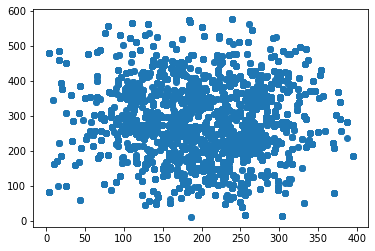

In [201]:
plt.scatter(X[:,0], X[:,1])
plt.show()
x=np.array([[25,25]])


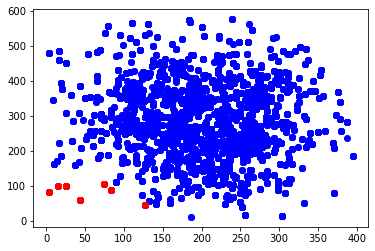

In [206]:
inds = knn(x, X, 50)
plt.scatter(X[:,0], X[:,1], c='b')
plt.scatter(X[inds,0], X[inds,1], c='r')
plt.show()


In [209]:
type (inds)

numpy.ndarray

In [210]:
potOrderList=list()
for i in inds:
    #print(ord[i].getStatus())
    if ord[i].isFulfilled()==False:
        potOrderList.append(i)
print(potOrderList)

[6648, 8426, 8427, 8428, 8429, 8430, 8431, 6645, 1331, 1332, 1340, 1339, 1338, 1337, 1336, 1333, 6646, 1335, 1334, 6647, 8425, 8274, 8264, 8265, 7777, 7774, 7776, 8266, 8267, 8268, 8269, 8432, 7558, 8270, 8271, 7557, 8272, 8273, 7775, 8262, 8275, 8263, 8261, 8509, 8510, 8260, 8276, 8277, 8278, 8507]
